# Initial Dataset Collection

In [57]:
# Let's first create our dataframe with professor's from Princeton, Harvard, Yale, Columbia, and NYU

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import ssl
import requests
import json
import csv
from  datetime import datetime
from requests.auth import HTTPBasicAuth
from time import sleep
import math

pd.options.display.mpl_style = 'default'
plt.rcParams['figure.figsize'] = (12, 8)

professors = set(['E0ihamsAAAAJ', '2P1kinAAAAAJ', 'GIZOqXoAAAAJ', 'E0ihamsAAAAJ', 'Knp-_9wAAAAJ', 'Xjg_fR4AAAAJ', 'ApxF7d8AAAAJ', 'UXmpersAAAAJ', 'XhSFeucAAAAJ', 'IeqjwlIAAAAJ', 'pa2g1GYAAAAJ', '2SPNehAAAAAJ', 'YIwiAAsAAAAJ','zkhHirIAAAAJ', 'E2uuNVoAAAAJ', 'Ff6era8AAAAJ', 'q16KVs0AAAAJ', 'VX7d5EQAAAAJ','Q_kKkIUAAAAJ', '-Km63D4AAAAJ', '-MQgcjYAAAAJ', '-V1HvPYAAAAJ', '0epc43IAAAAJ', '0hgmLKMAAAAJ', '2xBzrdYAAAAJ', '3BX3vWcAAAAJ', '5nUaWmMAAAAJ', '7OW6weoAAAAJ', '8JkiWl0AAAAJ', '8N_cfXsAAAAJ', '8_a-wgUAAAAJ', '8fztli4AAAAJ', '98Uq2IsAAAAJ', '9twfX9cAAAAJ', 'BxCCm4cAAAAJ', 'DKCx8hcAAAAJ', 'DSLquxEAAAAJ', 'D_JpQnAAAAAJ', 'E2uuNVoAAAAJ', 'EicYvbwAAAAJ', 'Fa13zIoAAAAJ', 'KC7FG9QAAAAJ', 'K__JmtcAAAAJ', 'KpNeomkAAAAJ', 'M0OB5XQAAAAJ', 'MDIyLnwAAAAJ', 'Md2HV1cAAAAJ', 'N2Rbbw8AAAAJ', 'P0YH9McAAAAJ', 'PA9La6oAAAAJ', 'Q3YPpnwAAAAJ', 'Se3D91QAAAAJ', 'U0NU_94AAAAJ', 'UMYf8QMAAAAJ', 'UWZA0v4AAAAJ', 'V4OPEAgAAAAJ', 'V6LJpwgAAAAJ', 'W3oUoyEAAAAJ', 'WGgk0_AAAAAJ', 'XmLMNyUAAAAJ', 'ZHMbRd4AAAAJ', 'ZasL8IoAAAAJ', 'bgfl9AYAAAAJ', 'blwKAkUAAAAJ', 'c1dydJIAAAAJ', 'f0Wc8tkAAAAJ', 'fP-OzuoAAAAJ', 'fyHJ87oAAAAJ', 'gXrMlhIAAAAJ', 'gvJX5l8AAAAJ', 'h0ZyN6QAAAAJ', 'jbB0DYUAAAAJ', 'k4Y1nEwAAAAJ', 'kGKlHp0AAAAJ', 'm50LZsUAAAAJ', 'mhmvCgsAAAAJ', 'nKR2tGvMLFMC', 'niwimDYAAAAJ', 'oQHsB5kAAAAJ', 'oj_DO_AAAAAJ', 'pju_kjIAAAAJ', 'v8n2lqAAAAAJ', 'vPEmzqYAAAAJ', 'wyCIJfQAAAAJ', 'yrFC-2EAAAAJ', 'zpN9P0sAAAAJ', 'zwax5qkAAAAJ', '-0rEuLgAAAAJ', '-1Gf_q8AAAAJ', '-1HhQ5IAAAAJ', '-2dA2aAAAAAJ', '-3tzojgAAAAJ', '-3yqfx0AAAAJ', '-3zOJ_kAAAAJ', '-4vWibwAAAAJ', '-5nvuQIAAAAJ', '-DjvoJQAAAAJ', '-E5k6m4AAAAJ', '-EAtp38AAAAJ', '-H1nkgEAAAAJ', '-Ie61WQAAAAJ', '-Jz7TjkAAAAJ', '-KJ4g5EAAAAJ', '-Km63D4AAAAJ', '-LPp6oUAAAAJ', '-LQFE1kAAAAJ', '-M3wKqMAAAAJ', '-NkxFNoAAAAJ', '-OYI2r8AAAAJ', '-QJLMYYAAAAJ', '-VxzwUkAAAAJ', '-XpkgP4AAAAJ', '-YZ5mIIAAAAJ', '-Z9DARQAAAAJ', '-ZR7E4kAAAAJ', '-afJI14AAAAJ', '-bj-Vw8AAAAJ', '-chjN0MAAAAJ', '-fSaZUQAAAAJ', '-fTYMtIAAAAJ', '-gEuUZIAAAAJ', '-h-y2TMAAAAJ', '-in6BbsAAAAJ', '-jhiSZcAAAAJ', '-lqU10oAAAAJ', '-m3tCYMAAAAJ', '-oklhvoAAAAJ', '-sfOVN0AAAAJ', '-tOFK-MAAAAJ', '-tccXVUAAAAJ', '-v12V0gAAAAJ', '-xT412YAAAAJ', '-xtxRgUAAAAJ', '-yISPoAAAAAJ', '00H10pgAAAAJ', '01-XV0YAAAAJ', '01EOkNEAAAAJ', '01II9NsAAAAJ', '02LEFO4AAAAJ', '05sMX8MAAAAJ', '07ds-DAAAAAJ', '07fr-vgAAAAJ', '08kwYsIAAAAJ', '0AreyRwAAAAJ', '0B_1nv4AAAAJ', '0Bi5CMgAAAAJ', '0Brxa0QAAAAJ', '0Df3zvEAAAAJ', '0G6BshUAAAAJ', '0GGsaLQAAAAJ ', '0H2JCzcAAAAJ', '0LoCGasAAAAJ', '0M1c80cAAAAJ', '0McWS1sAAAAJ', '0NdRndEAAAAJ', '0S-vxcAAAAAJ', '0UDqef8AAAAJ', '0V-jGE4AAAAJ', '0VF0VrMAAAAJ', '0XRxH18AAAAJ', '0_6ULyIAAAAJ', '0_vvBZkAAAAJ', '0b9VU3UAAAAJ', '0bGNnE0AAAAJ', '0bLt_qUAAAAJ', '0cd2b5YAAAAJ', '0e62fowAAAAJ', '0iMCkwYAAAAJ ', '0j1TcuMAAAAJ', '0jSdqoEAAAAJ', '0jeEp_sAAAAJ', '0kVAdOIAAAAJ', '0lcJYs8AAAAJ', '0lw2IQcAAAAJ', '0pZiZ7wAAAAJ', '0r5B_WMAAAAJ', '0tNS4zYAAAAJ', '0tWji68AAAAJ', '0v4dZR4AAAAJ', '0w8U7NQAAAAJ', '0wCG56YAAAAJ', '1-K50IEAAAAJ', '117h3CAAAAAJ', '11VHzxAAAAAJ', '11XkEUYAAAAJ', '12t5KIYAAAAJ', '1314ZLIAAAAJ', '13Tv6dkAAAAJ', '14DTOacAAAAJ', '17h_v9EAAAAJ', '18-0e2EAAAAJ', '19u74roAAAAJ', '19x8_zkAAAAJ', '1DpUSnsAAAAJ', '1HYDaVIAAAAJ', '1I0ff2cAAAAJ', '1J5hgBoAAAAJ', '1KQ1VqsAAAAJ', '1KUouT4AAAAJ', '1KYlUH0AAAAJ', '1NmuL2sAAAAJ', '1OwLa58AAAAJ', '1Pek5F4AAAAJ', '1SbDpEMAAAAJ', '1UVkpUMAAAAJ', '1VJV0PBeqtAC', '1YqIW-8AAAAJ', '1_W1qE4AAAAJ', '1akk5k4AAAAJ', '1cgLLZMAAAAJ', '1cy-HoEAAAAJ', '1dMXY88AAAAJ', '1dq4rVYAAAAJ', '1drUVwQAAAAJ', '1eX-pScAAAAJ', '1guy5W4AAAAJ', '1h-r4zQAAAAJ', '1h_0s3wAAAAJ', '1iaKML0AAAAJ', '1j3SqmIAAAAJ', '1jsx1_wAAAAJ', '1kbVOxQAAAAJ', '1kdjewoAAAAJ', '1pkMj2IAAAAJ', '1pmD24YAAAAJ', '1q4T4E4AAAAJ', '1rDKD9kAAAAJ', '1whFMuUAAAAJ', '1zmDOdwAAAAJ', '21AFfX4AAAAJ', '2370JKUAAAAJ', '23hGvpcAAAAJ', '24du3j4AAAAJ', '24v4NQwAAAAJ', '281NxdIAAAAJ', '29_4uuQAAAAJ', '2AF4iHIAAAAJ', '2C8X2nUAAAAJ', '2Fr4owoAAAAJ', '2GL4sGUAAAAJ', '2HR9-igAAAAJ', '2I1jz6sAAAAJ', '2IZDQsUAAAAJ', '2JEj3mAAAAAJ', '2JraTc4AAAAJ', '2KAIeUkAAAAJ', '2LlTUJQAAAAJ', '2QAvvPkAAAAJ', '2QOaPLIAAAAJ', '2RMUMXMAAAAJ', '2SXzngsAAAAJ', '2VMMoxkAAAAJ', '2VXzUz8AAAAJ', '2YLKXzwAAAAJ', '2YSb7xoAAAAJ', '2_OASxMAAAAJ', '2_Vain0AAAAJ', '2bpN2hIAAAAJ', '2dpvVVkAAAAJ', '2mkaUvkAAAAJ', '2nlfZ-sAAAAJ', '2nuN1FoAAAAJ', '2qGVuLQAAAAJ', '2uoT0ZcAAAAJ', '2upx1AcAAAAJ', '2vjgzfIAAAAJ', '2wH43aAAAAAJ', '2y0XBfQAAAAJ', '2y5y2IcAAAAJ', '2zalBv8AAAAJ', '338T-eEAAAAJ', '340g-nsAAAAJ', '34PkXd0AAAAJ', '34bu2-8AAAAJ', '34ohX6YAAAAJ', '355c8nQAAAAJ', '356kjv0AAAAJ', '35ExbXcAAAAJ', '35poHI8AAAAJ', '35uGc_MAAAAJ', '37AzLeAAAAAJ', '37Ztcy4AAAAJ', '37frPb8AAAAJ', '39Y_XUYAAAAJ', '39yX_hQAAAAJ', '3A9Xo_YAAAAJ', '3AjGEPoAAAAJ', '3AvyAbUAAAAJ', '3B1rkj8AAAAJ', '3Bl9cn8AAAAJ', '3ChhG88AAAAJ', '3Exv3SEAAAAJ', '3FgAMAgAAAAJ', '3GwK8GMAAAAJ', '3IY8BT4AAAAJ', '3KbHS4gAAAAJ', '3N5T0lEAAAAJ', '3O53MdAAAAAJ', '3Rr9R-8AAAAJ', '3Sk4Kl4AAAAJ', '3T3vX6sAAAAJ', '3TBEk90AAAAJ', '3U32i28AAAAJ', '3WsrhmoAAAAJ', '3aahhncAAAAJ', '3aw_314AAAAJ', '3c6mxxwAAAAJ', '3cL00e4AAAAJ', '3dVyIWQAAAAJ', '3erVpAcAAAAJ', '3gTCoiMAAAAJ', '3hiZkCcAAAAJ', '3j08YoAAAAAJ', '3jxovZAAAAAJ', '3kGP_7sAAAAJ', '3mXqzKcAAAAJ', '3nOMJ44AAAAJ', '3nl0vX8AAAAJ', '3p-KQUwAAAAJ', '3pZs3j0AAAAJ', '3q6CbSEAAAAJ', '3sAdLboAAAAJ', '3u5zUlMAAAAJ', '3vKjkoQAAAAJ', '3vniiLUAAAAJ', '3wvmkE0AAAAJ', '3yPEc4YAAAAJ', '3ziwAYIAAAAJ', '41s4aREAAAAJ', '428U9JQAAAAJ', '42Fpm2QAAAAJ', '43OX9dcAAAAJ', '44R7TLwAAAAJ', '45qIeiUAAAAJ', '45viIc4AAAAJ', '48jTyi4AAAAJ', '4BC3pZYAAAAJ', '4ClUgIwAAAAJ', '4GGxOjEAAAAJ', '4LRBnwMAAAAJ', '4Ma6NAYAAAAJ', '4N9pRgQAAAAJ', '4OlPthEAAAAJ', '4S7zXXAAAAAJ', '4T0smE8AAAAJ ', '4Tx_m3QAAAAJ', '4WKcrboAAAAJ', '4XGbTQkAAAAJ', '4ZvIfUMAAAAJ', '4ZyY-kUAAAAJ', '4_eJMVsAAAAJ  ', '4arkOLcAAAAJ', '4jSjQRUAAAAJ', '4kn_m8IAAAAJ', '4lxXlLkAAAAJ', '4mNN000AAAAJ', '4nxqm4sAAAAJ', '4osiWx0AAAAJ', '4pttWjEAAAAJ', '4roW41YAAAAJ', '4wcx4HMAAAAJ', '505wZYYAAAAJ', '50_ACG0AAAAJ', '52NB8D8AAAAJ', '52p4XZQAAAAJ', '5343WPMAAAAJ', '54LPUWAAAAAJ', '57f0tp0AAAAJ', '5AOb1xIAAAAJ', '5C1bJKkAAAAJ', '5CFXS04AAAAJ', '5CICo2YAAAAJ', '5EIL7zMAAAAJ', '5HpAr0QAAAAJ', '5IutNK8AAAAJ', '5JlEyTAAAAAJ', '5NAFTkAAAAAJ', '5NlthZIAAAAJ', '5OPdokIAAAAJ', '5QAqBv8AAAAJ', '5SdOM4wAAAAJ', '5UMv8f4AAAAJ', '5XjscEAAAAAJ', '5Xk4BakAAAAJ', '5_cfUtsAAAAJ', '5aMIIREAAAAJ', '5aV3juEAAAAJ ', '5bNq9W4AAAAJ', '5bxyMBwAAAAJ', '5d7KbbAAAAAJ', '5drv17QAAAAJ', '5ehPaYgAAAAJ', '5hQLn7kAAAAJ', '5hsZMeYAAAAJ', '5i9FResAAAAJ', '5jexx0wAAAAJ', '5n01gdYAAAAJ', '5q4fhUoAAAAJ', '5sVWLfgAAAAJ', '5sxR1GkAAAAJ', '5sz_jBoAAAAJ', '5wIt0lMAAAAJ', '5xUWSSIAAAAJ', '5yeY7N4AAAAJ', '6-CqWG4AAAAJ', '6-rjB04AAAAJ', '60PgV9AAAAAJ', '63M0SFwAAAAJ', '64BtMdsAAAAJ', '65msvoUAAAAJ', '65swYMkAAAAJ', '66e70RYAAAAJ', '67lGH6QAAAAJ', '68DVyNAAAAAJ', '69xB1doAAAAJ', '6AWzLpgAAAAJ', '6AoIb9cAAAAJ', '6BErMqUAAAAJ', '6CKsq0UAAAAJ', '6DCzih4AAAAJ', '6DPCAbwAAAAJ', '6EGqqdMAAAAJ', '6FBpjCQAAAAJ', '6Hb_Se0AAAAJ', '6IHX8J4AAAAJ', '6IKou-cAAAAJ', '6IxuJb8AAAAJ', '6KA6onQAAAAJ', '6LhC6gYAAAAJ', '6NmdCx0AAAAJ', '6PPOn2wAAAAJ', '6PTJF28AAAAJ', '6PyUkQoAAAAJ', '6RwoJ5AAAAAJ', '6S-WgLkAAAAJ', '6SSMIsoAAAAJ', '6SqXJQIAAAAJ', '6SvAfC4AAAAJ', '6WU2FLoAAAAJ', '6YDRaxwAAAAJ', '6ZDAUfgAAAAJ', '6ZTBU7EAAAAJ', '6_d9xjsAAAAJ', '6_wqtu4AAAAJ', '6bBdvEgAAAAJ', '6cSMGmwAAAAJ', '6ggnUzYAAAAJ', '6iK3dwkAAAAJ', '6im4cvQAAAAJ', '6iwsuOEAAAAJ', '6lVQXtgAAAAJ', '6lgUyK0AAAAJ', '6mFLkKgAAAAJ', '6n71IeYAAAAJ', '6pRf0pQAAAAJ', '6uTFlw4AAAAJ', '6uco-jYAAAAJ', '6ywZAeEAAAAJ', '7020qN8AAAAJ', '70Kbd10AAAAJ', '71RQt3sAAAAJ', '728SdKIAAAAJ', '747_-3sAAAAJ', '74eUkXgAAAAJ', '75-ZDAsAAAAJ', '77kOUvYAAAAJ', '79Lry6oAAAAJ', '7CgEux4AAAAJ', '7CqD-f4AAAAJ', '7K6SPM8AAAAJ', '7KI2Fa8AAAAJ', '7NhhkR8AAAAJ', '7OqyQeoAAAAJ', '7PeekG0AAAAJ', '7QRZG0oAAAAJ', '7SMK550AAAAJ', '7TdOx20AAAAJ', '7UV4ET4AAAAJ', '7UV_CksAAAAJ', '7VXD-swAAAAJ', '7WQbqdYAAAAJ', '7YPgMuIAAAAJ', '7YaWCusAAAAJ', '7_RpG90AAAAJ', '7cfMYMsAAAAJ', '7de84zoAAAAJ', '7eLlutsAAAAJ', '7gA-o6gAAAAJ', '7gEOGwcAAAAJ', '7iV1PPYAAAAJ', '7kgfYasAAAAJ', '7mMhUXwAAAAJ', '7msp7ioAAAAJ', '7oCYmT8AAAAJ', '7p_qrbwAAAAJ', '7rFMDhAAAAAJ', '7rrY01cAAAAJ', '7uhOwZAAAAAJ', '7vNt_0gAAAAJ', '82FA9YIAAAAJ', '84BlW84AAAAJ', '85Ly28EAAAAJ', '85TPZtwAAAAJ', '85mEA54AAAAJ', '86sc-d4AAAAJ', '8AThgqEAAAAJ', '8AkiZd8AAAAJ', '8B00uckAAAAJ', '8CgxCA8AAAAJ', '8GKMVBgAAAAJ', '8GP175UAAAAJ', '8L0rUDgAAAAJ', '8ME1IJcAAAAJ', '8OYE6iEAAAAJ', '8P7tOMAAAAAJ', '8Pu89u4AAAAJ', '8SPBf6QAAAAJ', '8ScVBj0AAAAJ', '8T7L96IAAAAJ', '8TqyoxcAAAAJ', '8VB0rLsAAAAJ', '8VTc3sgAAAAJ', '8WdWsoEAAAAJ', '8_LZmgEAAAAJ', '8ablIzIAAAAJ', '8fPm1GcAAAAJ', '8gU3gfQAAAAJ', '8hZrNjMAAAAJ', '8hcmmiUAAAAJ', '8k66GPEAAAAJ', '8mUdjzAAAAAJ  ', '8o7Xz_wAAAAJ', '8qrLbV4AAAAJ', '8rhw83wAAAAJ', '8syZZBAAAAAJ', '8sz4s7YAAAAJ', '8t5v7P4AAAAJ', '8wXPH5EAAAAJ', '905CeYUAAAAJ', '91Vnm_8AAAAJ', '91aVne8AAAAJ', '9CYI9UgAAAAJ', '9H5I3iIAAAAJ', '9HM33EQAAAAJ', '9I4xFcIAAAAJ', '9JaVNVAAAAAJ', '9K_yONYAAAAJ', '9L-K5eYAAAAJ', '9MSpWOUAAAAJ', '9MrGDvkAAAAJ', '9ORNGyIAAAAJ', '9OukeycAAAAJ', '9PW-tPAAAAAJ', '9PdkBaoAAAAJ', '9R0m2m0AAAAJ', '9RlvgLEAAAAJ', '9UsnvkgAAAAJ', '9WTQXgwAAAAJ', '9YxOOSQAAAAJ', '9aw_QGAAAAAJ', '9fGoifYAAAAJ', '9fK20LYAAAAJ  ', '9hPnkXsAAAAJ', '9kGLKUAAAAAJ', '9mvqa0QAAAAJ', '9nin00UAAAAJ', '9puL9pAAAAAJ', '9pzp818AAAAJ', '9rhTp_0AAAAJ', '9uz_njoAAAAJ', '9vfavVMAAAAJ', 'A0rdFEAAAAAJ', 'A2-9yy0AAAAJ', 'A9DgoAEAAAAJ', 'A9e6sPYAAAAJ', 'ADm2OHgAAAAJ', 'AEle77cAAAAJ', 'AFHKzqgAAAAJ', 'AFT1UEYAAAAJ', 'AG9C5LQAAAAJ', 'AIqSNEEAAAAJ', 'AKAHOvwAAAAJ', 'ALiLzkEAAAAJ', 'ALqlN_gAAAAJ', 'AMGwjlkAAAAJ', 'AQgCA68AAAAJ', 'AUBCaboAAAAJ', 'AW49xiMAAAAJ', 'AZkVOeAAAAAJ', 'A_YMnXgAAAAJ', 'AbwTFdcAAAAJ', 'Ag_6KEgAAAAJ', 'AkaD11kAAAAJ', 'AlGQ8ZEAAAAJ', 'AlxBEk8AAAAJ', 'AmyzpLAAAAAJ ', 'AnALXFcAAAAJ', 'AnceZ2oAAAAJ', 'Aq4FHJYAAAAJ', 'AqbgNbIAAAAJ', 'AquBArcAAAAJ', 'AqwZtWcAAAAJ', 'AuwFM1AAAAAJ', 'AvSyKvwAAAAJ', 'B0cNWzEAAAAJ', 'B14Y9q0AAAAJ ', 'B1a2egQAAAAJ', 'B1gEb58AAAAJ', 'B3XqkfMAAAAJ', 'B4FUUZkAAAAJ', 'B58w_bQAAAAJ', 'B6ZqFrUAAAAJ', 'B8BkZ1IAAAAJ', 'BAvhQIoAAAAJ', 'BAyuyicAAAAJ', 'BCfR6eAAAAAJ', 'BD8llAEAAAAJ', 'BDqIRPkAAAAJ', 'BECu7wYAAAAJ', 'BEHaCBcAAAAJ', 'BEHcR-IAAAAJ', 'BFE6IQwAAAAJ', 'BFtWlhEAAAAJ', 'BH2mxiQAAAAJ', 'BI9LifAAAAAJ', 'BIuoDN4AAAAJ  ', 'BJ1TE4AAAAAJ', 'BJPBnXwAAAAJ', 'BKG_SzMAAAAJ', 'BKWUWz8AAAAJ', 'BLgrU3UAAAAJ', 'BOMboVoAAAAJ', 'BRbxQwwAAAAJ', 'BV5qSLAAAAAJ', 'BV8WIV8AAAAJ', 'BVq9k8cAAAAJ', 'BYEVqhIAAAAJ ', 'BYr3tkwAAAAJ', 'BZC20PEAAAAJ', 'B_rKfusAAAAJ', 'Bcd6LF8AAAAJ', 'Bcvkc-8AAAAJ', 'Bd6zvWIAAAAJ', 'BdTpqHQAAAAJ', 'Bdn4jRIAAAAJ', 'Bf7zuUQAAAAJ', 'BfVPpmQAAAAJ', 'BgOXDogAAAAJ', 'BghVDhgAAAAJ', 'BgvKF4sAAAAJ', 'BhIIVrQAAAAJ', 'BjhVX6MAAAAJ', 'BkXokq0AAAAJ', 'Bm9BwEQAAAAJ', 'BmVRqrQAAAAJ', 'BmkOLucAAAAJ', 'Bmnfx5oAAAAJ', 'BnYUpU8AAAAJ', 'Bo8JYHIAAAAJ', 'BogZYvAAAAAJ', 'Bp6tvy0AAAAJ', 'BrKoyUwAAAAJ', 'BuuMZQYAAAAJ', 'BvLt4yQAAAAJ', 'BvibPpgAAAAJ', 'BxlScrEAAAAJ', 'C-LkdokAAAAJ', 'C-Tnq-AAAAAJ', 'C0ANojIAAAAJ', 'C1VwgssAAAAJ', 'C1c54H4AAAAJ', 'C1m61jIAAAAJ', 'C3HHY7oAAAAJ', 'C4JOUooAAAAJ', 'C4s4dT0AAAAJ', 'C8rjgJwAAAAJ', 'CAPmDP0AAAAJ', 'CBjDcy8AAAAJ', 'CIWk1xEAAAAJ', 'CIt3zpQAAAAJ', 'CJ-jR_MAAAAJ', 'CJII9ckAAAAJ', 'CK6FeiUAAAAJ', 'CM-Wwf4AAAAJ', 'CMf9fM0AAAAJ', 'CNavElkAAAAJ ', 'CNavElkAAAAJ  ', 'CO3EcrgAAAAJ', 'COE6KUgAAAAJ', 'COVB2tMAAAAJ', 'COrhJXcAAAAJ', 'CSyeEIcAAAAJ', 'CT0KWYUAAAAJ', 'CTPwvRMAAAAJ', 'CUXbme0AAAAJ', 'CVKG5MoAAAAJ', 'CYeyJdYAAAAJ', 'CZxwKdYAAAAJ', 'CfOjeqgAAAAJ', 'CgItEbQAAAAJ', 'Cgq2_M0AAAAJ', 'ChbVg1YAAAAJ', 'ChqdpxEAAAAJ', 'CmoKVuUAAAAJ', 'CmpEzW8AAAAJ', 'Cp_G5UwAAAAJ', 'CtBH_3QAAAAJ', 'CubLy_4AAAAJ', 'Cuj063UAAAAJ', 'CvRI7KQAAAAJ', 'CyXmgzIAAAAJ', 'D03AT9EAAAAJ', 'D22GptUAAAAJ', 'D3oyNxEAAAAJ', 'D4IyZfEAAAAJ', 'D4JJZf8AAAAJ', 'D6fk8zcAAAAJ', 'D6h2cTYAAAAJ', 'D8O1JNrl--gC', 'DAUIkZYAAAAJ', 'DAZYvycAAAAJ', 'DBclUHAAAAAJ', 'DC4SKYgAAAAJ', 'DDo2hmQAAAAJ', 'DFb0ChUAAAAJ', 'DFxeUYYAAAAJ', 'DGb-sBwAAAAJ', 'DHCL5zIAAAAJ', 'DJPRZawAAAAJ', 'DJ_PCuYAAAAJ', 'DKjQXF4AAAAJ ', 'DLko6dMAAAAJ', 'DM5NbVMAAAAJ', 'DN1aEJIAAAAJ', 'DN7tGooAAAAJ', 'DP_EJ4gAAAAJ', 'DQyEUKAAAAAJ', 'DSddIf4AAAAJ', 'DUaLtscAAAAJ', 'DVPkYwQAAAAJ', 'DW9FDNIAAAAJ', 'DWmImIAAAAAJ', 'DYbiO2EAAAAJ', 'DZn9uLkAAAAJ', 'D_Rebd0AAAAJ', 'DbDbLZEAAAAJ', 'Deo7vLsAAAAJ', 'DjPaB_QAAAAJ', 'DkfzcnwAAAAJ', 'DknsgF8AAAAJ ', 'DlWkhUkAAAAJ', 'Dn8X_gIAAAAJ', 'Dn_qYK8AAAAJ', 'DnnCWN0AAAAJ', 'DoH2pD0AAAAJ', 'Dp3nYY0AAAAJ', 'Dp_OkXAAAAAJ', 'DqYW_rUAAAAJ', 'Dr2VJYcAAAAJ', 'DwiSqq0AAAAJ', 'Dx1EblMAAAAJ', 'DxoenfgAAAAJ', 'DzaKkJoAAAAJ', 'E4cgK1cAAAAJ', 'E6GRsP4AAAAJ', 'E70YzQEAAAAJ', 'E7gOgRsAAAAJ', 'E9Si0BQAAAAJ', 'ECzaPKYAAAAJ', 'EGf6KN0AAAAJ', 'EGmoKVAAAAAJ', 'ELHWxlkAAAAJ', 'EMkLeUoAAAAJ', 'EMwCfNgAAAAJ', 'ENeJ_gkAAAAJ', 'ENrCmbMAAAAJ', 'EO6eQRkAAAAJ', 'ERUd22YAAAAJ', 'EV4xSaAAAAAJ', 'EWN5NYMAAAAJ', 'EWW74ycAAAAJ', 'EWjPxcIAAAAJ', 'EXGhxQwAAAAJ', 'EXpjfQ8AAAAJ', 'EZjSxgwAAAAJ', 'EcMD4XQAAAAJ', 'Edj7KkYAAAAJ', 'EhOP0hUAAAAJ', 'EhZrLdAAAAAJ', 'EiuJ7dEAAAAJ', 'EkK91jIAAAAJ', 'ElAtiUsAAAAJ', 'ElTNdUwAAAAJ', 'Em7dpRIAAAAJ', 'EoaDsJIAAAAJ', 'ErVxNWkAAAAJ', 'Etpzd_UAAAAJ', 'Evgx6UkAAAAJ', 'EvtrACcAAAAJ', 'ExHzZbUAAAAJ', 'Eyw0v-QAAAAJ', 'F1RsvjEAAAAJ', 'F4FPs_QAAAAJ', 'F6QiwyMAAAAJ', 'F8MMGQsAAAAJ', 'F9PvJQEAAAAJ', 'FAm6WBMAAAAJ', 'FCB777EAAAAJ', 'FDotjqUAAAAJ', 'FDpXTiMAAAAJ', 'FE461eEAAAAJ', 'FEBziZ0AAAAJ', 'FHwJqMAAAAAJ', 'FI9InsQAAAAJ', 'FJFdjJcAAAAJ', 'FJgoNJ0AAAAJ', 'FLbkR3MAAAAJ', 'FM3vRPgAAAAJ', 'FOF0PmEAAAAJ', 'FRTxEQwAAAAJ', 'FTYtHb4AAAAJ', 'FUndNhkAAAAJ', 'FVTgmOwAAAAJ', 'FVovBSsAAAAJ', 'FVtXBlwAAAAJ', 'FXbbGUYAAAAJ', 'FXzV5yQAAAAJ', 'FYEzlVIAAAAJ', 'FZBjJ4cAAAAJ', 'FZdkuUgAAAAJ', 'F_RdaG4AAAAJ', 'FayXlTYAAAAJ', 'Fc6GIIQAAAAJ', 'Fd-zyZkAAAAJ', 'Fe-ewu8AAAAJ', 'FecYwZ0AAAAJ', 'Fet3c58AAAAJ', 'Ff6era8AAAAJ', 'FfSLV1kAAAAJ', 'FgBABV4AAAAJ', 'FhafUFIAAAAJ', 'FiT9vikAAAAJ  ', 'FmMT4CcAAAAJ', 'FmrDR68AAAAJ', 'Fo_zBqsAAAAJ', 'Fu61e0wAAAAJ', 'Fvfu8yQAAAAJ', 'FwVdvhQAAAAJ', 'FyhRqdYAAAAJ', 'G0rV_dcAAAAJ', 'G2EJz5kAAAAJ', 'G3NBUzwAAAAJ', 'G3ux1H0AAAAJ', 'G3vFTtAAAAAJ', 'G4E4wWEAAAAJ', 'G7gLHXIAAAAJ', 'G817vKkAAAAJ', 'G95MEZcAAAAJ', 'GAkD1iwAAAAJ ', 'GExyiRkAAAAJ', 'GFufNdoAAAAJ', 'GGioe0AAAAAJ', 'GHA2TtYAAAAJ', 'GHvY-TgAAAAJ', 'GMYRGDMAAAAJ', 'GMZOB68AAAAJ', 'GMf49iMAAAAJ', 'GOAglKYAAAAJ', 'GOOFRX0AAAAJ', 'GPQZdckAAAAJ', 'GR5FOqMAAAAJ', 'GSTfB-gAAAAJ', 'GSyUS9wAAAAJ', 'GTvOETIAAAAJ', 'GUvS50IAAAAJ', 'G_9MWCgAAAAJ', 'Ga0i--0AAAAJ', 'GdMsXNwAAAAJ', 'Gg-H5ngAAAAJ', 'Gg86q1wAAAAJ', 'GjXWAh8AAAAJ', 'GjdbojAAAAAJ', 'GlBl-VUAAAAJ', 'GmAKsf8AAAAJ', 'Go2PsW4AAAAJ', 'GpkraS0AAAAJ', 'Gs5F2jYAAAAJ', 'Gscc2O4AAAAJ', 'GshEAaIAAAAJ', 'GtDEmnkAAAAJ', 'Gz5xg8sAAAAJ', 'Gzy2X6kAAAAJ', 'H0rv5zIAAAAJ', 'H4cQsHAAAAAJ', 'H509xdsAAAAJ', 'H7W84LcAAAAJ', 'H7WEpOMAAAAJ', 'H8mW424AAAAJ', 'H99Ln2wAAAAJ', 'HCSGjdsAAAAJ', 'HEC6xzkAAAAJ', 'HF2gswkAAAAJ', 'HG8AJwMAAAAJ', 'HGFWFJAAAAAJ ', 'HI6m-dsAAAAJ', 'HJ27ZUQAAAAJ', 'HJWSrNMAAAAJ', 'HJt-6nkAAAAJ', 'HLBY5tgAAAAJ', 'HLyacE0AAAAJ', 'HNViRH8AAAAJ', 'HP7qnfgAAAAJ', 'HSDt9D0AAAAJ', 'HURCElMAAAAJ', 'HWxGEesAAAAJ', 'HXdaP9cAAAAJ', 'HaahwTYAAAAJ', 'Hb6J54cAAAAJ', 'Hb6LiN4AAAAJ', 'HbZWMykAAAAJ', 'HjRF_4EAAAAJ', 'HlkJu3cAAAAJ', 'HmPxDZMAAAAJ', 'Hmw2siAAAAAJ', 'Hq3IQOIAAAAJ', 'HrHxdCgAAAAJ', 'HrYKXocAAAAJ', 'HuGql-MAAAAJ', 'HuH9c7kAAAAJ', 'HuJslgMAAAAJ', 'HvSjJlEAAAAJ', 'Hwk4sP0AAAAJ', 'I-tdv7kAAAAJ', 'I0QihpsAAAAJ', 'I0V3RMAAAAAJ', 'I0X_EccAAAAJ', 'I3VVNvkAAAAJ', 'I4WnZs0AAAAJ', 'I4jsKh0AAAAJ', 'I7HjkvUAAAAJ', 'IBcs-ZwAAAAJ', 'IF-2OWAAAAAJ ', 'IF0C9wQAAAAJ', 'IGhTusIAAAAJ', 'IGyIeMsAAAAJ', 'ILZqfIsAAAAJ', 'IOud35IAAAAJ', 'IP7PKQwAAAAJ', 'IPbxgZkAAAAJ', 'IR0yJB8AAAAJ', 'IRW7XZwAAAAJ', 'ISk7okAAAAAJ', 'ITnf2fwAAAAJ', 'IVnwurkAAAAJ', 'IVu2p-0AAAAJ', 'IWdFbTQAAAAJ', 'IYhqRO4AAAAJ', 'I_YsXU4AAAAJ', 'Iae7qqcAAAAJ', 'IfkLt8QAAAAJ', 'Ifl1VQEAAAAJ', 'IgcV2xAAAAAJ', 'IjJwrLEAAAAJ', 'Ijm-624AAAAJ', 'Ijnh8E0AAAAJ', 'ImpbxLsAAAAJ', 'ImtW1GEAAAAJ', 'IoGj8UEAAAAJ', 'IogtbOYAAAAJ', 'IpSjYIoAAAAJ ', 'IpSjYIoAAAAJ  ', 'IpcWrZ8AAAAJ', 'IrQ6LpsAAAAJ', 'ItLhJVAAAAAJ', 'IyzKSScAAAAJ', 'IzLlyzsAAAAJ', 'IzXDyR8AAAAJ', 'J0SNQXQAAAAJ', 'J1odWbkAAAAJ', 'J33lXlMAAAAJ', 'J3P7PhEAAAAJ', 'J3ck_DoAAAAJ', 'J4XiHbsAAAAJ', 'J5HfMc0AAAAJ', 'J5t58MEAAAAJ', 'J5wwvFMAAAAJ', 'J67CrV8AAAAJ', 'J6abCRgAAAAJ', 'J8J7NvkAAAAJ', 'J8YyZugAAAAJ', 'J9Eo_rUAAAAJ', 'JA0o2TUAAAAJ ', 'JAaO3voAAAAJ', 'JDX1fQYAAAAJ', 'JE85Ie8AAAAJ', 'JG0tDEEAAAAJ', 'JGNmw2QAAAAJ', 'JHwivywAAAAJ', 'JI2td6YAAAAJ', 'JJ9AvbAAAAAJ', 'JKR4krMAAAAJ', 'JL5hT9wAAAAJ', 'JMDD_p0AAAAJ', 'JMHXmgwAAAAJ', 'JMKe_tcAAAAJ', 'JMzCwGEAAAAJ', 'JNJTwKgAAAAJ', 'JPZWLKQAAAAJ', 'JPi34mwAAAAJ', 'JRG5LRMAAAAJ', 'JT72piEAAAAJ', 'JThS8LMAAAAJ', 'JUn8PgwAAAAJ', 'JWC5VisAAAAJ', 'JWHaRbIAAAAJ', 'JWjHgEAAAAAJ ', 'JWlphDcAAAAJ', 'JXRuZjAAAAAJ', 'JZhAjrQAAAAJ', 'J_S5pkkAAAAJ', 'J_YIRIAAAAAJ', 'Ja2ROkcAAAAJ', 'Jaig6CQAAAAJ', 'JgDKULMAAAAJ', 'JhLnb8sAAAAJ', 'Jiw7P2IAAAAJ', 'JnvHx20AAAAJ', 'Jo__-hMAAAAJ', 'Joau394AAAAJ', 'JomQHS0AAAAJ', 'Jp-0jdwAAAAJ', 'JpAehzgAAAAJ', 'Js2ligEAAAAJ', 'Jt1sCk8AAAAJ', 'JthnPXkAAAAJ', 'JuP4UCIAAAAJ', 'JvctKJcAAAAJ', 'Jw2UgWIAAAAJ', 'JyABkTwAAAAJ', 'K-0P27YAAAAJ', 'K-8392kAAAAJ', 'K-_M5PcAAAAJ', 'K2hMn3AAAAAJ', 'K5hmGHcAAAAJ', 'K5jbFJAAAAAJ', 'K6IBTPYAAAAJ', 'K6OeTIkAAAAJ', 'K6T_Pg4AAAAJ', 'KAwonZ0AAAAJ', 'KB_9qLUAAAAJ', 'KF3CIq0AAAAJ', 'KFKMy1gAAAAJ', 'KHfU0I0AAAAJ', 'KJ6EaDIAAAAJ', 'KP2EfmcAAAAJ', 'KQlX5jEAAAAJ', 'KRQ8Er0AAAAJ', 'KRXr5_oAAAAJ', 'KRkHmBIAAAAJ', 'KSCKNpoAAAAJ', 'KUzRlHIAAAAJ', 'KcORY9QAAAAJ', 'Ke98QNIAAAAJ', 'KeJQQdgAAAAJ', 'Keb01PsAAAAJ', 'Kgs2TjUAAAAJ', 'Kh9REfEAAAAJ', 'Khy1CnYAAAAJ', 'KjUO5YAAAAAJ', 'Kk81WdAAAAAJ', 'KnTKjAMAAAAJ', 'KnwE7qoAAAAJ', 'KvBHACwAAAAJ', 'Kwy5bd0AAAAJ', 'KxlIGYoAAAAJ', 'L0GRQc4AAAAJ', 'L1-cVvoAAAAJ', 'L2m6-GgAAAAJ', 'L4XoGqUAAAAJ', 'L7-o9SUAAAAJ', 'L7vygrQAAAAJ', 'L82mYv8AAAAJ', 'L8GpcRcAAAAJ', 'LF0aMw4AAAAJ', 'LH3UZjYAAAAJ', 'LHFgM4IAAAAJ', 'LHJeO8UAAAAJ', 'LIdVlPsAAAAJ', 'LIjnUGgAAAAJ', 'LKApouEAAAAJ', 'LKMLmOoAAAAJ', 'LKx7rDsAAAAJ', 'LLQPXi4AAAAJ', 'LNTcDlAAAAAJ', 'LRkgt_UAAAAJ', 'LSxTtpMAAAAJ', 'LTyI2MYAAAAJ', 'LUs0O6MAAAAJ', 'LV655fkAAAAJ', 'LW0aiV4AAAAJ', 'LX9H-OwAAAAJ', 'LXYl9ScAAAAJ', 'L_BrtCEAAAAJ', 'L_O2kH0AAAAJ', 'La28XvEAAAAJ', 'Lb4-GKsAAAAJ', 'Le4ScQcAAAAJ', 'LfcroyAAAAAJ', 'LgF3Ds0AAAAJ', 'LgIevswAAAAJ', 'LgXKUXEAAAAJ', 'Lhi8jeAAAAAJ', 'Li4dpM8AAAAJ', 'LiaylyYAAAAJ', 'Liz6NGgAAAAJ', 'LkauQ-AAAAAJ', 'LmaL6okAAAAJ', 'Lmxn948AAAAJ', 'LnhCGNMAAAAJ', 'LpEQiY0AAAAJ', 'Ls5kVcEAAAAJ', 'LsAvclgAAAAJ', 'LsgR-OQAAAAJ  ', 'LtKQnmMAAAAJ', 'LtMuT7IAAAAJ', 'LvS2GCoAAAAJ', 'LvT9KkMAAAAJ', 'Lw4pPtUAAAAJ', 'Lx1MNTsAAAAJ', 'LyEq7qEAAAAJ', 'LywkJAkAAAAJ', 'M-QH1w0AAAAJ', 'M0OB5XQAAAAJ', 'M3sY_coAAAAJ', 'M5FaNdwAAAAJ', 'M62QiJcAAAAJ', 'MAqEdFMAAAAJ', 'MB5kq1UAAAAJ', 'MEmcGf8AAAAJ', 'MFBPZ_sAAAAJ', 'MFZEbUEAAAAJ', 'MHu1yfUAAAAJ', 'MIbkpRgAAAAJ', 'MK-PwPEAAAAJ', 'MKFIgS0AAAAJ', 'MLSFPVQAAAAJ', 'MNLKCOQAAAAJ', 'MOvJxOMAAAAJ', 'MPsp_DcAAAAJ', 'MTwVFZAAAAAJ', 'MUiMkrYAAAAJ', 'MV8KGT0AAAAJ', 'MXCTBcwAAAAJ', 'MY5w3hgAAAAJ', 'MYOcaZsAAAAJ', 'MYPBnPQAAAAJ', 'MYrv4_YAAAAJ', 'McBFzIMAAAAJ', 'MdORQMcAAAAJ', 'Me4t2sQAAAAJ', 'MfK7Gd8AAAAJ', 'MhTBCh0AAAAJ', 'MhcrACMAAAAJ', 'MludGJEAAAAJ', 'MplR7_cAAAAJ', 'MptFS7gAAAAJ', 'MqW56AkAAAAJ', 'MrWIWNwAAAAJ', 'Mrh5qcwAAAAJ', 'MsjvTpUAAAAJ', 'Mt2ZZ5UAAAAJ', 'MvggBtkAAAAJ', 'MwLqCs4AAAAJ', 'MwqZR-gAAAAJ', 'My_nEmYAAAAJ', 'MzD8rjoAAAAJ', 'Mzw-LBIAAAAJ', 'N05OoPkAAAAJ', 'N0PkqnEAAAAJ', 'N1ZLAV8AAAAJ', 'N1l0UM8AAAAJ', 'N21x8vEAAAAJ', 'N5M5yMQAAAAJ', 'N6ddP5cAAAAJ', 'N7VWLEwAAAAJ', 'N96q_iQAAAAJ', 'NDg0XsIAAAAJ', 'NFmCFlsAAAAJ', 'NFww4iQAAAAJ', 'NGKWT4gAAAAJ', 'NJViYyEAAAAJ', 'NJViYyEAAAAJ ', 'NK7srJYAAAAJ', 'NKQijJAAAAAJ', 'NKfk-IgAAAAJ', 'NNgLW8wAAAAJ', 'NO1Je2kAAAAJ', 'NOXfz64AAAAJ', 'NRO3JckAAAAJ', 'NSAmRHoAAAAJ', 'NSz6MSwAAAAJ', 'NWIMAqIAAAAJ', 'NY-3zUwAAAAJ', 'NZZyA5sAAAAJ', 'N_9p2rMAAAAJ', 'NcW-vkYAAAAJ', 'Nep12KYAAAAJ', 'NfZxGU8AAAAJ', 'NflzmRIAAAAJ', 'NhP9VjIAAAAJ', 'NjIINpAAAAAJ', 'Nm4jbvIAAAAJ', 'NmZWitkAAAAJ', 'NmlzwEMAAAAJ', 'NmoASSIAAAAJ', 'NpGcJDkAAAAJ', 'NpcNxIMAAAAJ', 'NrCRKyQAAAAJ', 'NwKi_KwAAAAJ', 'Nwyc4C0AAAAJ', 'NxBuRgcAAAAJ', 'Nzby29YAAAAJ', 'O0QT0JkAAAAJ', 'O167Bw8AAAAJ', 'O2_z8rcAAAAJ', 'O3OPCyEAAAAJ', 'O9dIOvMAAAAJ', 'OAQyP8IAAAAJ', 'OAR7VWwAAAAJ', 'OAqxHroAAAAJ', 'OCWuI2oAAAAJ', 'OEivUAQAAAAJ', 'OGR--C0AAAAJ', 'OGbrzHAAAAAJ', 'OH_DCjMAAAAJ', 'OL-xJk4AAAAJ', 'OMRS2mYAAAAJ', 'OMVTRscAAAAJ', 'ONqMRhgAAAAJ', 'OOnOxPoAAAAJ', 'OP0G9lYAAAAJ', 'OQtO4Z8AAAAJ', 'OUO1MbMAAAAJ', 'OUpIbcQAAAAJ', 'OYkcQVoAAAAJ', 'OZ0ta5gAAAAJ', 'OZfliS4AAAAJ', 'OZyhctcAAAAJ', 'O_ikyOkAAAAJ', 'OahAyXAAAAAJ', 'OdVU0AEAAAAJ', 'OdoUZagAAAAJ', 'OlNv-7AAAAAJ', 'Om4rGiQAAAAJ', 'OneFw6oAAAAJ', 'OnjxWE0AAAAJ', 'OoFQXQQAAAAJ', 'OsVNJ5QAAAAJ  ', 'OsumH3IAAAAJ', 'Ot9AwugAAAAJ', 'OtJWZZoAAAAJ', 'OtXt1UcAAAAJ', 'OwA3zyMAAAAJ', 'OxGfOMAAAAAJ', 'Oxz9kncAAAAJ', 'P06VtiYAAAAJ', 'P2AY7oEAAAAJ', 'P2VyO-YAAAAJ', 'P4Mfke8AAAAJ', 'P5xcdGMAAAAJ', 'P6Zfrk0AAAAJ', 'P8bxnKQAAAAJ', 'PA9La6oAAAAJ', 'PB7jeM4AAAAJ', 'PBV6PjEAAAAJ', 'PBrpwSsAAAAJ', 'PCtoyLcAAAAJ', 'PE3EPxwAAAAJ', 'PGOEQhAAAAAJ', 'PJBH31cAAAAJ', 'PLH_BFgAAAAJ', 'PMHXcoAAAAAJ', 'PMM9J2AAAAAJ', 'PNAYyPMAAAAJ', 'PNUQKQ4AAAAJ', 'POJ0vZ8AAAAJ', 'POWKkqEAAAAJ', 'PP0vgNAAAAAJ', 'PP7eitcAAAAJ', 'PRX7FxYAAAAJ', 'PRpHLY4AAAAJ', 'PS-TM94AAAAJ', 'PSQPL_kAAAAJ', 'PTHL_cUAAAAJ', 'PTwfmrwAAAAJ', 'PWPRFrgAAAAJ', 'PZD-520AAAAJ', 'Patm-BEAAAAJ', 'PcI8fPYAAAAJ', 'PfciJkgAAAAJ', 'PfjLsNIAAAAJ', 'PhDDPiUAAAAJ', 'PhXVmpgAAAAJ', 'PhtqioMAAAAJ', 'Pi5XrCsAAAAJ', 'PiL9imIAAAAJ', 'PjCDBjIAAAAJ', 'Pm5R9MUAAAAJ', 'PogsVkYAAAAJ', 'PrghO58AAAAJ', 'PrtIArUAAAAJ', 'Ps73fz8AAAAJ', 'PtjsiWsAAAAJ', 'Pv1u_CcAAAAJ', 'PvCVxMwAAAAJ', 'Pvb6rzEAAAAJ', 'Pz0YttAAAAAJ', 'PzySf88AAAAJ', 'Q0YasD_1COAC', 'Q1oXj5sAAAAJ', 'Q3v-FPAAAAAJ', 'Q4lRDTMAAAAJ', 'Q55S8mcAAAAJ', 'Q8V7TEkAAAAJ', 'QAM4NuwAAAAJ', 'QAd3gu8AAAAJ', 'QC5BwP0AAAAJ', 'QDv3lhEAAAAJ', 'QF3UoDoAAAAJ', 'QFHKYBAAAAAJ', 'QLX18bkAAAAJ', 'QL_4UfgAAAAJ', 'QR3vl5IAAAAJ', 'QRW-VLcAAAAJ', 'QRnEq78AAAAJ', 'QU2unccAAAAJ', 'QVS1AfkAAAAJ', 'QYON_6MAAAAJ', 'QZFTip4AAAAJ', 'Q_kKkIUAAAAJ', 'Qazkh9QAAAAJ', 'Qc7U3TcAAAAJ', 'QceDydIAAAAJ', 'QchpnBsAAAAJ', 'QcyrhWEAAAAJ', 'QeiiSMwAAAAJ', 'QfnUvj4AAAAJ', 'QgeH9zAAAAAJ', 'Qh3ws80AAAAJ', 'QhFhbCEAAAAJ', 'QhgE7bIAAAAJ', 'QiqCRx8AAAAJ', 'Qjb5DnwAAAAJ', 'QkUaXyYAAAAJ', 'QoeHRJIAAAAJ', 'Qozc9X0AAAAJ', 'QqTbMtQAAAAJ', 'Qrd7FCoAAAAJ', 'Qs2N8fMAAAAJ', 'QsmO0R4AAAAJ', 'QuWBUjwAAAAJ', 'Qv7WMz0AAAAJ', 'QviK0DEAAAAJ', 'Qx1j90UAAAAJ', 'QyFLE7IAAAAJ', 'R-z1R84AAAAJ', 'R0NEUOwAAAAJ', 'R1cfTCoAAAAJ', 'R5nkatMAAAAJ', 'R73nAI4AAAAJ', 'R8vshUsAAAAJ', 'RAGiAS0AAAAJ', 'RBuoCYEAAAAJ', 'RCKnpFIAAAAJ', 'RDfdfr0AAAAJ', 'REDO3eQAAAAJ', 'RFmkZ-EAAAAJ', 'RJ_gjosAAAAJ', 'RMvtW7IAAAAJ', 'ROISpb0AAAAJ', 'RQcNZ6QAAAAJ', 'RTgwp14AAAAJ', 'RUHgsf0AAAAJ', 'RUP4S68AAAAJ', 'R_fV7c4AAAAJ', 'RaScARwAAAAJ', 'ReCRGPcAAAAJ', 'RfGMy94AAAAJ', 'Rh2vS5wAAAAJ', 'RhOpyXcAAAAJ', 'RhUcYmQAAAAJ', 'Rhg3ercAAAAJ', 'RjWhT6UAAAAJ', 'RjkjOcAAAAAJ', 'RjlkCwwAAAAJ', 'RlKfZx4AAAAJ', 'RnAYKf4AAAAJ', 'RnwdD_8AAAAJ', 'RuAbhuUAAAAJ', 'RuXDiTQAAAAJ', 'Rubr0TUAAAAJ', 'RvgCrdMAAAAJ', 'RzEnQmgAAAAJ', 'S-8-QyIAAAAJ', 'S0RhavQAAAAJ', 'S2yYRQIAAAAJ', 'S5ZP2DoAAAAJ', 'S5sz8gIAAAAJ', 'S6-gFiMAAAAJ', 'S6vCsrEAAAAJ', 'SAriGBYAAAAJ', 'SBQ2Ke8AAAAJ', 'SCCzdQgAAAAJ', 'SCLPQO4AAAAJ', 'SDY9FwUAAAAJ', 'SIEV_PgAAAAJ', 'SIzD2kkAAAAJ', 'SJz79EQAAAAJ', 'SKNqC3cAAAAJ', 'SKiaRN0AAAAJ', 'SN2zDOEAAAAJ', 'SNtE_MsAAAAJ', 'SOqB2kMAAAAJ', 'SPOQajMAAAAJ', 'SQzKCuUAAAAJ', 'STCjfGEAAAAJ', 'STPiGykAAAAJ', 'SUOW9PwAAAAJ', 'SWXvuR0AAAAJ', 'SYXq28IAAAAJ', 'SYp57mkAAAAJ', 'S_jYB2sAAAAJ', 'Sa2AIxQAAAAJ', 'Sadz1uwAAAAJ', 'SazOHOQAAAAJ', 'ScFGLv0AAAAJ', 'ScaYvQ0AAAAJ', 'SeX4MlEAAAAJ', 'Sha9_3YAAAAJ', 'Si5QnFAAAAAJ', 'Sl-ouYgAAAAJ', 'SlUyJIIAAAAJ', 'Sllc7a4AAAAJ', 'SnHEJPgAAAAJ', 'Sp4fJhoAAAAJ', 'SpEQbS4AAAAJ', 'SqMUez0AAAAJ', 'SqlfKBsAAAAJ', 'SsATDcQAAAAJ', 'StzbHDAAAAAJ', 'SuRLAr4AAAAJ', 'Sugf4KEAAAAJ', 'SvnnEI8AAAAJ', 'SyS8rVcAAAAJ', 'T2vp1pgAAAAJ', 'T3egfLkAAAAJ', 'T5vEEycAAAAJ', 'T7Q62kgAAAAJ', 'T9V8gawAAAAJ', 'T9a08xsAAAAJ', 'TDcp_T0AAAAJ', 'TDzdHZgAAAAJ', 'TGRPKRIAAAAJ', 'TH_j5GsAAAAJ', 'TJMHkwIAAAAJ', 'TKAUSip1sWcJ', 'TKPXa3UAAAAJ', 'TLYUAB8AAAAJ', 'TN3_IdIAAAAJ', 'TO5SRlwAAAAJ', 'TPu4vycAAAAJ', 'TSjwE_wAAAAJ', 'TYdEzrcAAAAJ', 'T_c4yuoAAAAJ', 'TarnQO8AAAAJ', 'TbUEDGIAAAAJ', 'Tc5d5NIAAAAJ', 'TeH9z0oAAAAJ', 'TjdpbicAAAAJ', 'TkP2lSIAAAAJ', 'TmjPUm0AAAAJ', 'TnohakcAAAAJ', 'Tnvl5EcAAAAJ', 'TpWJmycAAAAJ', 'Tqy9hQ4AAAAJ', 'Tt4hKsQAAAAJ', 'TujWwSgAAAAJ', 'TyX3mJMAAAAJ', 'U2PsSqYAAAAJ', 'U2o28z4AAAAJ', 'U3DFw60AAAAJ', 'U3MXFe4AAAAJ', 'UBypGzIAAAAJ', 'UC0cHzIAAAAJ', 'UC47O1wAAAAJ ', 'UEI2g60AAAAJ', 'UGnGjNYAAAAJ', 'UGrnqBUAAAAJ', 'UHaMIhwAAAAJ', 'ULMitTMAAAAJ', 'UN1WEPgAAAAJ', 'UP17h_gAAAAJ', 'UPOVXrQAAAAJ', 'UQ9Ws6wAAAAJ', 'URX5zu4AAAAJ', 'US9LorMAAAAJ', 'UTG5whgAAAAJ', 'UUUsthIAAAAJ', 'UVuQeJIAAAAJ', 'UX3r5GQAAAAJ', 'UXFidGcAAAAJ', 'UXmpersAAAAJ', 'UYNQzLcAAAAJ', 'UZlNlxAAAAAJ', 'UbDPAsMAAAAJ', 'Ubz_PksAAAAJ', 'Uc98gkAAAAAJ', 'Ud7FiiEAAAAJ', 'UdaJi94AAAAJ', 'UfBj4K4AAAAJ', 'UfCVnIcAAAAJ', 'UflkO2kAAAAJ', 'Uh4OBskAAAAJ', 'Uj5cUZUAAAAJ', 'UjZ1YPYAAAAJ', 'Uktq8uIAAAAJ', 'UlazcK8AAAAJ', 'UmZ0DmoAAAAJ', 'Uo53PhIAAAAJ', 'Uqh341MAAAAJ', 'Uria0VYAAAAJ', 'UsW4ViYAAAAJ', 'Usgtc7wAAAAJ', 'Uth3R70AAAAJ', 'UuB6csEAAAAJ', 'UurWKWUAAAAJ', 'UxdRPL8AAAAJ', 'V-GEil8AAAAJ', 'V-nB8scAAAAJ', 'V0cN4_sAAAAJ', 'V1Fo-PAAAAAJ', 'V1S4r2gAAAAJ', 'V1sUopIAAAAJ', 'V35oAqQAAAAJ', 'V5QFbSwAAAAJ', 'V79Wn2cAAAAJ', 'V8bau84AAAAJ', 'VB7IHIAAAAAJ', 'VBBjgXsAAAAJ', 'VDJQu5MAAAAJ', 'VE-4qkMAAAAJ', 'VEGtG7YAAAAJ', 'VFno0TcAAAAJ', 'VGaoB64AAAAJ', 'VGga3R4AAAAJ', 'VHB8158AAAAJ', 'VMCinEEAAAAJ', 'VMa4D-sAAAAJ', 'VMihW8oAAAAJ', 'VMyEVIYAAAAJ', 'VNI_Zf4AAAAJ', 'VOEcxPUAAAAJ', 'VOf45S0AAAAJ', 'VRNa93kAAAAJ', 'VWIT1GwAAAAJ', 'VWX-GMAAAAAJ', 'VYMNfI8AAAAJ', 'VYgXrmIAAAAJ', 'VZdeeMEAAAAJ', 'VZzIZHwAAAAJ', 'V_SOxRkAAAAJ', 'VafYYacAAAAJ', 'Vbyzf7QAAAAJ', 'VcOjgngAAAAJ', 'VeHNm4EAAAAJ', 'VfIoA6UAAAAJ', 'VgPd6sMAAAAJ', 'VgqrWjUAAAAJ', 'Vl1IDvYAAAAJ', 'VlNQzaYAAAAJ ', 'Vm3QdpkAAAAJ', 'Vmc1YZwAAAAJ', 'VoSxM1AAAAAJ', 'Vp8nPGkAAAAJ', 'Vq3tLbUAAAAJ', 'Vr5iLk0AAAAJ', 'VrcMAUIAAAAJ', 'VsHf-U8AAAAJ', 'Vu07J18AAAAJ', 'VusVB38AAAAJ  ', 'Vv8UdowAAAAJ', 'VvJGY68AAAAJ', 'VwSks3oAAAAJ', 'VzZbxKYAAAAJ', 'VzgMq64AAAAJ', 'VzokaskAAAAJ', 'W-T6t9oAAAAJ', 'W-mDQS0AAAAJ', 'W1HIItwAAAAJ', 'W34EYM4AAAAJ', 'W6gQqWcAAAAJ', 'W86IC8cAAAAJ', 'W8CB0PQAAAAJ', 'WB5k-aMAAAAJ', 'WKfXwHkAAAAJ', 'WLN3QrAAAAAJ', 'WLOrHh8AAAAJ', 'WMBEnXAAAAAJ', 'WNEBDpQAAAAJ', 'WONDZ00AAAAJ', 'WQkBYwQAAAAJ', 'WRxfyN0AAAAJ', 'WStI88cAAAAJ', 'WXUqb1QAAAAJ', 'WYcYBMwAAAAJ', 'WYfyrwgAAAAJ', 'WZvejEIAAAAJ', 'Wdny3bkAAAAJ', 'WfWmJV0AAAAJ', 'WhhC4LwAAAAJ', 'WikV1c8AAAAJ', 'WjKsLX0AAAAJ', 'WkFtWsEAAAAJ', 'WlcqFNcAAAAJ', 'WnJPVDMAAAAJ', 'WoSF130AAAAJ', 'WoSILroAAAAJ', 'Wov5tYoAAAAJ', 'WpKDYOUAAAAJ', 'Wph6P_IAAAAJ', 'Wq8XTykAAAAJ', 'Wr1mOp0AAAAJ', 'WuOsGfsAAAAJ', 'WwHdMNwAAAAJ', 'X-l0QKsAAAAJ', 'X-rE604AAAAJ', 'X1N99wsAAAAJ', 'X1_BP00AAAAJ', 'X2CfcBEAAAAJ', 'X3MSZmwAAAAJ', 'X3Mn3zcAAAAJ', 'X53rkecAAAAJ', 'X6TcjC4AAAAJ', 'X9vpoyQAAAAJ', 'XCo4OfoAAAAJ', 'XDX7EYIAAAAJ', 'XE683E8AAAAJ', 'XHWdzcEAAAAJ', 'XLZaKTYAAAAJ', 'XMKt0ycAAAAJ', 'XOtBoaMAAAAJ', 'XPqD-OMAAAAJ  ', 'XQJh51oAAAAJ', 'XQQegLAAAAAJ', 'XS4RrpMAAAAJ', 'XSTsbJ0AAAAJ', 'XUPIOr4AAAAJ', 'XVCyP5EAAAAJ', 'XWl6OhQAAAAJ', 'XXNt5l0AAAAJ', 'XZ-arzQAAAAJ', 'XaOmQk4AAAAJ', 'Xb6cCjsAAAAJ', 'XdIBO4cAAAAJ', 'XdUM66YAAAAJ', 'XduL3a0AAAAJ', 'Xe55Kl4AAAAJ', 'XeyiyUYAAAAJ', 'XfMKIU4AAAAJ', 'Xfs6cN0AAAAJ', 'Xi6wOjIAAAAJ', 'Xj2qmLUAAAAJ', 'Xjmx5DcAAAAJ', 'XkIpaS4AAAAJ', 'XmOXc8S6gUsC', 'XmjbcDAAAAAJ', 'Xn10Y5MAAAAJ', 'XoQK9ScAAAAJ', 'XpEr2UEAAAAJ', 'Xr5ZsF4AAAAJ', 'XrVLezoAAAAJ', 'XrsfLvwAAAAJ', 'XsCunYgAAAAJ', 'XsLGqhkAAAAJ ', 'XsVIMTcAAAAJ', 'XwrePIwAAAAJ', 'XxlvNmoAAAAJ', 'Xxmiua8AAAAJ', 'XyYfBc0AAAAJ', 'Xzwyl9AAAAAJ', 'Y062oJcAAAAJ', 'Y0LsOJsAAAAJ', 'Y1zVG20AAAAJ', 'Y2SzgkQAAAAJ', 'Y38a2hgAAAAJ', 'Y5K6I3wAAAAJ', 'Y5f-dtAAAAAJ', 'Y6Yzy-8AAAAJ', 'Y79vE90AAAAJ', 'Y8uSakAAAAAJ', 'YBMCy6QAAAAJ', 'YBdhFnUAAAAJ', 'YDoXLvgAAAAJ', 'YEd_7_wAAAAJ', 'YFtskgcAAAAJ', 'YGJFCTkAAAAJ', 'YH0HowcAAAAJ', 'YHSRCCsAAAAJ', 'YHt0VPEAAAAJ', 'YImZhh0AAAAJ', 'YIwiAAsAAAAJ', 'YJNIWfsAAAAJ', 'YK8dNvsAAAAJ', 'YKFQEFAAAAAJ', 'YLiPQ_wAAAAJ', 'YLjpc_cAAAAJ', 'YNsOmK8AAAAJ', 'YOFkSSgAAAAJ', 'YOrLGyAAAAAJ', 'YPzKczYAAAAJ', 'YUTXhccAAAAJ', 'YVFHQagAAAAJ', 'YW0bw2oAAAAJ', 'YWTSNOkAAAAJ', 'YWo1jFgAAAAJ', 'YZHj-Y4AAAAJ', 'Yaj1TqkAAAAJ', 'YaxFkwkAAAAJ', 'Yc3ZIx0AAAAJ', 'YcuocEoAAAAJ', 'YdlZ7PIAAAAJ', 'Ydwv2DYAAAAJ', 'YemTuC8AAAAJ', 'Yf8OqQQAAAAJ', 'YfIkdAcAAAAJ', 'YjNpttcAAAAJ', 'YjmcA1EAAAAJ', 'YjpanIYAAAAJ', 'YlPwh40AAAAJ', 'Ylcj1RUAAAAJ', 'YrQCulcAAAAJ', 'YrUtJqEAAAAJ', 'Ys7sayUAAAAJ', 'YsCuxPMAAAAJ', 'Yu9GLm0AAAAJ', 'YvjuUugAAAAJ', 'YvvpezQAAAAJ', 'Yx-RH8EAAAAJ', 'YzWjRzIAAAAJ', 'Z2CMkBMAAAAJ', 'Z3myMtcAAAAJ', 'Z6kSHc0AAAAJ', 'ZA5dz8MAAAAJ', 'ZBkyZBIAAAAJ', 'ZG8QBsIAAAAJ', 'ZHR496kAAAAJ', 'ZKRWBZsAAAAJ', 'ZKWbbNYAAAAJ', 'ZLTu65AAAAAJ', 'ZO8JH6YAAAAJ', 'ZOwrNN0AAAAJ', 'ZQHLxBcAAAAJ', 'ZRiT9fkAAAAJ', 'ZRunLP0AAAAJ', 'ZSgEv9YAAAAJ', 'ZUBmqWsAAAAJ', 'ZVXhE_oAAAAJ', 'ZVsrmn4AAAAJ', 'ZWjtqZgAAAAJ', 'ZWuaSEMAAAAJ', 'ZYKzBUkAAAAJ', 'ZYufUlwAAAAJ', 'ZZ-mOxkAAAAJ', 'ZZO1ik4AAAAJ', 'ZZrSuh8AAAAJ', 'Z_-HVMoAAAAJ', 'Z_94FToAAAAJ', 'Z_Lb3woAAAAJ', 'ZaM74AgAAAAJ', 'ZasL8IoAAAAJ', 'ZavV5qIAAAAJ', 'Zb0am48AAAAJ', 'ZbYGzLcAAAAJ', 'ZboIq6YAAAAJ', 'ZcmwrJoAAAAJ', 'Ze-SN4cAAAAJ', 'ZflJqeUAAAAJ', 'Zh1vTeMAAAAJ', 'Zj3c4BAAAAAJ', 'ZjMD03UAAAAJ ', 'ZloWMUQAAAAJ', 'ZlpExMwAAAAJ', 'Zp9TGGQAAAAJ', 'ZpG_cJwAAAAJ', 'ZqIlAdgAAAAJ', 'ZuTRDI8AAAAJ', 'ZwehxpwAAAAJ', 'Zxdn7DwAAAAJ', '_1WXALoAAAAJ', '_4LMcJEAAAAJ', '_4ngW-AAAAAJ', '_4zvSRIAAAAJ', '_5tSZCYAAAAJ', '_6XYKXMpK34C', '_8296EwAAAAJ', '_AfgHRoAAAAJ', '_Bs2dk4AAAAJ', '_CNYi6MAAAAJ', '_GCJCWsAAAAJ', '_IqibU4AAAAJ', '_KUMofAAAAAJ', '_N_t3QcAAAAJ', '_NvtkAoAAAAJ', '_Ny8InwAAAAJ', '_QwpgEsAAAAJ', '_R2wQEkAAAAJ ', '_R2wQEkAAAAJ  ', '_Rc2f7UAAAAJ', '_TNg-0QAAAAJ', '_UDtZ_QAAAAJ', '_V-WQykAAAAJ', '_VE0ihEAAAAJ', '_Vu6QVAAAAAJ', '_W8FzmoAAAAJ', '_WRZiyAAAAAJ', '_YenRskAAAAJ', '__z1kpoAAAAJ', '_aNfO_0AAAAJ', '_ajtFCMAAAAJ', '_dGUQ1MAAAAJ', '_e5OvWgAAAAJ', '_fcVMIwAAAAJ', '_gBx6QMAAAAJ', '_gmgEMAAAAAJ', '_ijUncEAAAAJ', '_jGHG0IAAAAJ', '_k10BxoAAAAJ', '_lYdXdgAAAAJ', '_ld2hfcAAAAJ', '_meWHBIAAAAJ', '_mk9LSkAAAAJ', '_oL3awcAAAAJ', '_pPy-pAAAAAJ', '_pYGFUwAAAAJ', '_qBJ1I0AAAAJ', '_t-WPdUAAAAJ', '_ufj_vUAAAAJ', '_vdf32oAAAAJ', '_vwkhBkAAAAJ', '_xvLDPoAAAAJ', '_zpa9XYAAAAJ', '_zwI1akAAAAJ', 'a2mQJNUAAAAJ', 'a7BZV9YAAAAJ', 'a7LHl00AAAAJ', 'a7qro_YAAAAJ', 'a8I8S8YAAAAJ', 'a959F6AAAAAJ', 'a9q1gTYAAAAJ', 'aADBDZcAAAAJ', 'aAkhR2MAAAAJ', 'aAuHR8MAAAAJ', 'aBRHqn4AAAAJ', 'aBxHVEQAAAAJ', 'aCSds20AAAAJ', 'aCcW0-wAAAAJ', 'aCkLjUoAAAAJ', 'aDd3xn4AAAAJ', 'aEovwtUAAAAJ', 'aGcifQQAAAAJ', 'aHs9Ra4AAAAJ', 'aIhLM5MAAAAJ', 'aJOeGRoAAAAJ', 'aLOSzWwAAAAJ', 'aM6b6BkAAAAJ', 'aPlMXLAAAAAJ', 'aPnllnsAAAAJ', 'aSDT1M8AAAAJ', 'aUWuwJ8AAAAJ', 'aVorcfUAAAAJ', 'aWZ0YN4AAAAJ', 'a_NjEmEAAAAJ', 'ackSng8AAAAJ', 'adjHvRYAAAAJ', 'adqvICAAAAAJ', 'afHZ8E0AAAAJ', 'ahynY3gAAAAJ', 'aiPryaQAAAAJ', 'ailQ-KAAAAAJ', 'ajVR5gEAAAAJ', 'aoTXkP0AAAAJ', 'apOctPMAAAAJ', 'apYP_l4AAAAJ', 'aqQ_eLYAAAAJ', 'aqhbwSMAAAAJ', 'ar6BDYIAAAAJ', 'asxJYMYAAAAJ', 'avGHyPoAAAAJ', 'avh8BOUAAAAJ', 'b-t2E4wAAAAJ', 'b0zji6EAAAAJ', 'b4cFNacAAAAJ', 'b6tIduoAAAAJ', 'b7VGLi0AAAAJ', 'b7djhCMAAAAJ', 'bAa___kAAAAJ', 'bCAGsg0AAAAJ', 'bCMRPogAAAAJ', 'bD4ePUsAAAAJ', 'bDSq2ksAAAAJ', 'bGCvkDkAAAAJ', 'bHxVMEYAAAAJ', 'bI9Q6BIAAAAJ', 'bICXmbEAAAAJ', 'bIu___8AAAAJ', 'bKON6gYAAAAJ', 'bLBRzpYAAAAJ', 'bM1EYZgAAAAJ', 'bMOqYycAAAAJ  ', 'bTMNlZ4AAAAJ', 'bX_SR0wAAAAJ', 'bcCYp-0AAAAJ', 'bcQIgBEAAAAJ', 'bdUpOTQAAAAJ', 'bdc_lGgAAAAJ', 'bgAgsb0AAAAJ', 'bgjJKygAAAAJ', 'biK7yyYAAAAJ', 'biK7yyYAAAAJ ', 'biYoCI4AAAAJ', 'biuzU-AAAAAJ', 'blhJ8wQAAAAJ', 'blwKAkUAAAAJ', 'bpzQxdkAAAAJ ', 'bsMKf_YAAAAJ', 'bsROXv0AAAAJ', 'bsqhvmAAAAAJ', 'bt-TFlwAAAAJ', 'buVarXYAAAAJ', 'bv5xjWIAAAAJ', 'bxi6JXYAAAAJ', 'by0TPPEAAAAJ', 'c-YSS1sAAAAJ', 'c0R9_OMAAAAJ', 'c0S3o-EAAAAJ', 'c0yPSEYAAAAJ', 'c1I8_1gAAAAJ', 'c1ZEOJYAAAAJ', 'c4Qw3QoAAAAJ', 'c4bammQAAAAJ', 'c8Bm0y0AAAAJ', 'cAy9G6oAAAAJ', 'cB3Vq9UAAAAJ', 'cCwN3-4AAAAJ', 'cF2lHxgAAAAJ', 'cIygBvkAAAAJ', 'cKntAwYAAAAJ', 'cLndH1QAAAAJ', 'cPmMoXoAAAAJ', 'cS9Fcf4AAAAJ', 'cUljZU0AAAAJ', 'cWL4CAcAAAAJ', 'cWe_xpUAAAAJ', 'cXm7iGcAAAAJ', 'cYoahsBLcjsC', 'cbjbpysAAAAJ', 'cc4Qi_IAAAAJ', 'ccCNF08AAAAJ', 'cda_kO0AAAAJ', 'cdcieC4AAAAJ', 'cdvBK5kAAAAJ', 'ckGcuyUAAAAJ', 'ckxwzPAAAAAJ', 'cmedVkoAAAAJ', 'cmkUKuQAAAAJ', 'cmqewL4AAAAJ', 'cnjwLA8AAAAJ', 'cqE2sbUAAAAJ', 'ctHVoM8AAAAJ', 'cv01tHsAAAAJ', 'cvGvtcYAAAAJ', 'cw1v_08AAAAJ', 'd1Jk5ecAAAAJ', 'd1yRJw0AAAAJ', 'd6c0T-4AAAAJ', 'dAUoW5AAAAAJ', 'dAZjBBBreNQC', 'dEioki8AAAAJ', 'dErAioMAAAAJ', 'dF7HJ18AAAAJ', 'dGWv5VwAAAAJ', 'dHSIiisAAAAJ', 'dJ7wKJgAAAAJ', 'dJlFSXkAAAAJ', 'dJlucB8AAAAJ', 'dJm60ZoAAAAJ', 'dJmIFXYAAAAJ', 'dOMwfkoAAAAJ', 'dOsHUoMAAAAJ', 'dQI_hoYAAAAJ', 'dRmx8foAAAAJ', 'dTgMpZAAAAAJ', 'dTjW_-in1WMC ', 'dVbRE1YAAAAJ', 'dW-nNhMAAAAJ', 'dXCyTdoAAAAJ', 'dXYgg6wAAAAJ', 'dYwbc9sAAAAJ', 'dafyFOcAAAAJ', 'datbpk4AAAAJ', 'dbBW62EAAAAJ', 'dbNmxiAAAAAJ', 'diA1cIMAAAAJ', 'dilO2p4AAAAJ', 'dj4EiqsAAAAJ', 'djGENZIAAAAJ', 'djRAUcYAAAAJ', 'dkDw4zEAAAAJ', 'dlRF9NAAAAAJ', 'dmfomKsAAAAJ', 'doUOYYQAAAAJ', 'dqJPxhEAAAAJ', 'ds2UBMMAAAAJ', 'dtqzigUAAAAJ', 'duCRaqgAAAAJ', 'dxCq0WoAAAAJ', 'dyxEUXMAAAAJ', 'e-4hCZkAAAAJ', 'e2t-2tlzmv4C', 'e45MrjkAAAAJ', 'e4JfTgsAAAAJ', 'e5AJZO0AAAAJ', 'e5alfo0AAAAJ', 'e6YEaeEAAAAJ', 'e7V7-gEAAAAJ', 'e8aRmAsAAAAJ', 'eDzzGUQAAAAJ', 'eKqVx84AAAAJ', 'eLflQgQAAAAJ', 'eMs1ptMAAAAJ', 'eQNyi-YAAAAJ', 'eQUn8ugAAAAJ', 'eTntzxEAAAAJ', 'eU6CiPQAAAAJ', 'eUgyFekAAAAJ', 'eWFBBl8AAAAJ', 'eYUD0w4AAAAJ', 'eaMNlu8AAAAJ', 'ebltLIwAAAAJ', 'ecxYXBsAAAAJ', 'efhkMN4AAAAJ', 'ehPe09YAAAAJ  ', 'emHGm2IAAAAJ', 'ep52oxEAAAAJ', 'epdrD9wAAAAJ', 'erITQIoAAAAJ', 'erv7TP0AAAAJ', 'esQq_iAAAAAJ', 'euq570kAAAAJ', 'ewj_YZoAAAAJ', 'ez52Y4EAAAAJ', 'f-uwtXAAAAAJ', 'f0VIbq0AAAAJ', 'f0qBLVkAAAAJ', 'f1-WTeUAAAAJ', 'f1Y1c2UAAAAJ', 'f30TEOgAAAAJ', 'f3g5oeEAAAAJ', 'f46No0UAAAAJ', 'f4kX0c4AAAAJ', 'f8t5S4UAAAAJ', 'fBVG0lkAAAAJ', 'fF2VPpEAAAAJ', 'fFtCj3YAAAAJ', 'fIHWMcwAAAAJ', 'fJiGhkoAAAAJ', 'fJy1tloAAAAJ', 'fKQ4QLYAAAAJ', 'fKsY32YAAAAJ', 'fLEfYUUAAAAJ', 'fLRRRrcAAAAJ', 'fQbd2-MAAAAJ', 'fRLhUjcAAAAJ', 'fTepyGoAAAAJ', 'fUkICMwAAAAJ', 'fVCZuxAAAAAJ', 'fVgkojgAAAAJ', 'f_g-5wkAAAAJ', 'fc0VgPAAAAAJ', 'fg_h250AAAAJ', 'fhLHgd8AAAAJ', 'fi8FWO4AAAAJ', 'fiGXzRQAAAAJ', 'fizPmUgAAAAJ', 'fj7kxiQAAAAJ', 'fjKK2gwAAAAJ', 'fqmA64sAAAAJ', 'fqy0tRYAAAAJ', 'fr0-PcUAAAAJ', 'frpKM2EAAAAJ', 'fueau_UAAAAJ', 'fv1RjgEAAAAJ', 'fw6xDy0AAAAJ', 'fyf_Vt4AAAAJ', 'fzSHXS8AAAAJ', 'g-621msAAAAJ', 'g0OMhNcAAAAJ', 'g1arXSYAAAAJ', 'g2VFGuoAAAAJ', 'g4Vzt1IAAAAJ', 'g5_gy5IAAAAJ', 'g5wn9QEAAAAJ', 'g5zfB_MAAAAJ', 'g6mt150AAAAJ', 'g6noKX0AAAAJ', 'g7CJICAAAAAJ', 'g7skETwAAAAJ', 'g8i-q28AAAAJ', 'g9IIQMUAAAAJ', 'g9WIbh0AAAAJ', 'g9ZZqUsAAAAJ', 'gBBP6OEAAAAJ', 'gBRCkiwAAAAJ', 'gBlHRhwAAAAJ', 'gCHMEZEAAAAJ', 'gCySXA8AAAAJ', 'gFb9vegAAAAJ', 'gFk-uBYAAAAJ', 'gFptjm0AAAAJ', 'gH4eEdsAAAAJ', 'gHLwOp4AAAAJ', 'gKBFr_QAAAAJ', 'gLOWgh8AAAAJ', 'gODP8bYAAAAJ', 'gOKF4tgAAAAJ', 'gOzv9M4AAAAJ', 'gP-PebcAAAAJ', 'gQ1osqMAAAAJ', 'gSSYwMgAAAAJ', 'gYcOstMAAAAJ', 'g_uZDGYAAAAJ', 'gaGbpUcAAAAJ', 'gaXiAekAAAAJ', 'ga_UYfkAAAAJ', 'gb2r2ssAAAAJ', 'gbVh3PEAAAAJ', 'gbYZ69AAAAAJ', 'gc21ScUAAAAJ', 'gcW8W80AAAAJ', 'gesfW8sAAAAJ', 'gewVBA4AAAAJ', 'gfXFqKwAAAAJ', 'gfwTWzIAAAAJ', 'giXQHa4AAAAJ', 'gifVlIMAAAAJ', 'gjrImvQAAAAJ', 'gnQunOwAAAAJ', 'goOrwYQAAAAJ', 'gphWqToAAAAJ', 'gppbmsQAAAAJ', 'gpqxxCoAAAAJ', 'grQ_GBgAAAAJ', 'gsX-cv8AAAAJ', 'gtYrWy4AAAAJ', 'gufeibYAAAAJ', 'gvosjlAAAAAJ', 'gxFj6bAAAAAJ', 'gzW23KoAAAAJ', 'h1mbed0AAAAJ', 'h21JFU0AAAAJ', 'h2hgRJoAAAAJ', 'h4afn-MAAAAJ', 'h67w8QsAAAAJ', 'h8N2A-MAAAAJ', 'hBezLaYAAAAJ', 'hC4JfeMAAAAJ', 'hF8NuEcAAAAJ', 'hI_-O8YAAAAJ', 'hKE_0yMAAAAJ', 'hN2aVK0AAAAJ', 'hNQu_j4AAAAJ', 'hPGicu4AAAAJ', 'hTqKvtoAAAAJ', 'hUk21mAAAAAJ', 'hWYleB8AAAAJ', 'hXYspUsAAAAJ', 'hZg5aOsAAAAJ', 'hZs6p-kAAAAJ', 'hbaPnrUAAAAJ', 'hcmW-W0AAAAJ', 'hd03BJ0AAAAJ', 'hdoeGB0AAAAJ', 'he2sRIAAAAAJ', 'hiWagvQAAAAJ', 'hkc4nPAAAAAJ', 'hmq4rGIAAAAJ', 'hmy9MpkAAAAJ', 'ho9niaIAAAAJ', 'hoGTGlMAAAAJ', 'hocDMPYAAAAJ', 'hrI8aH8AAAAJ', 'ht_PaFUAAAAJ', 'hut6V-cAAAAJ', 'hvthl-MAAAAJ', 'hwQtFB0AAAAJ', 'hwqQOpUAAAAJ', 'hzWDi8MAAAAJ', 'i36j4A8AAAAJ', 'i39wDTcAAAAJ', 'i5srt20AAAAJ', 'i8jvUgUAAAAJ', 'i8yeTEgAAAAJ', 'i9HC9QMAAAAJ', 'i9NxBmUAAAAJ', 'iAqJssMAAAAJ', 'iDX9SN4AAAAJ', 'iFv_jlAAAAAJ', 'iGkvtxwAAAAJ', 'iJRR-NMAAAAJ', 'iLQqwosAAAAJ', 'iLXSMP8AAAAJ', 'iM5If-oAAAAJ', 'iME3jMYAAAAJ', 'iMfIu2QAAAAJ', 'iOQ3330AAAAJ', 'iQ4UbgcAAAAJ', 'iRPZEPsAAAAJ', 'iT7_PykAAAAJ', 'iUSmaVYAAAAJ', 'iZAsYLgAAAAJ', 'ia3Ry4YAAAAJ', 'ihW44-YAAAAJ', 'ih_fL3YAAAAJ', 'iiL1vqoAAAAJ', 'iiUle70AAAAJ', 'iiyj5MsAAAAJ', 'im82jgIAAAAJ', 'inYyDE4AAAAJ', 'iopnWAMAAAAJ', 'irLI1XAAAAAJ', 'irznsSoAAAAJ', 'iutt2Z8AAAAJ', 'iuuh4EMAAAAJ', 'ivBtPM4AAAAJ', 'ivsdmxkAAAAJ', 'ixsX5LcAAAAJ', 'j-nzjK4AAAAJ', 'j02QDMIAAAAJ', 'j2DN1AwAAAAJ', 'j38QfhkAAAAJ', 'j5HgL4MAAAAJ', 'j6382AQAAAAJ', 'j6AUGOkAAAAJ', 'j6jd4MwAAAAJ', 'j8J8D7YAAAAJ', 'j8q4KRQAAAAJ ', 'j9pxF3UAAAAJ', 'jBTsescAAAAJ', 'jF3TiMQAAAAJ', 'jGboazkAAAAJ', 'jJbGMWEAAAAJ', 'jNkKWXEAAAAJ', 'jPWYGggAAAAJ', 'jTATuu0AAAAJ', 'jXJNXq8AAAAJ', 'jZoDCSsAAAAJ', 'jaoxVkQAAAAJ', 'jd2t1voAAAAJ', 'jeWLCfMAAAAJ', 'jeabV8gAAAAJ', 'jf9IoOUAAAAJ', 'jfrK-H4AAAAJ', 'jfyu9uUAAAAJ', 'ji20eNEAAAAJ', 'jjQDKYYAAAAJ', 'jkK_OWsAAAAJ', 'jlBqYAQAAAAJ', 'jmSoUP4AAAAJ', 'joYrFnYAAAAJ', 'jpzeUbcAAAAJ', 'jsM4W_kAAAAJ', 'jt4uBuUAAAAJ', 'juUEPSAAAAAJ', 'jysM7c4AAAAJ', 'jz_fFx0AAAAJ', 'k4EfJAUAAAAJ', 'k7wFBfgAAAAJ', 'k93FQp4AAAAJ', 'k94U4ZgAAAAJ', 'kCdNAD4AAAAJ', 'kDO1FPUAAAAJ', 'kEXTeI4AAAAJ', 'kFduPiIAAAAJ', 'kFxLqZMAAAAJ', 'kGVDEC4AAAAJ', 'kGhSw24AAAAJ', 'kH6n_QEAAAAJ', 'kH_t7-MAAAAJ', 'kIzW2nMAAAAJ', 'kK2oqWMAAAAJ', 'kKIBVVoAAAAJ', 'kOjJf6IAAAAJ', 'kPa3A_AAAAAJ', 'kRnOVXYAAAAJ  ', 'kTr5nqQAAAAJ', 'kX3-iI8AAAAJ', 'kXVBr20AAAAJ', 'kY_YpKkAAAAJ', 'k_POrRkAAAAJ', 'kaIG0QkAAAAJ', 'kbZ4i-oAAAAJ', 'kcLsmp4AAAAJ', 'kg4bCpgAAAAJ', 'khtBzpUAAAAJ', 'kifetB8AAAAJ', 'kjYhZYwAAAAJ', 'klpxQoEAAAAJ', 'kmDmwisAAAAJ', 'knVX-5QAAAAJ', 'kpMqWhcAAAAJ', 'kr3N46gAAAAJ', 'krlRXgIAAAAJ', 'ktVtURoAAAAJ', 'ktoku4EAAAAJ', 'ktwwLjsAAAAJ', 'kybwg2oAAAAJ', 'kyue4JAAAAAJ', 'l2Pr9m8AAAAJ', 'l3KIq-MAAAAJ', 'l4ZJZkYAAAAJ', 'l5vcWK4AAAAJ', 'l7x2uYAAAAAJ', 'lC2JIwgAAAAJ', 'lCgSjYAAAAAJ', 'lCqW0YwAAAAJ', 'lDsOeZIAAAAJ', 'lEGGMI0AAAAJ', 'lFOOSb0AAAAJ', 'lHAzrZcAAAAJ', 'lIenFmIAAAAJ', 'lJR7Z44AAAAJ', 'lNmR2vAAAAAJ', 'lPGnwm0AAAAJ', 'lPirNQYAAAAJ', 'lQHBpe4AAAAJ', 'lQ_fshkAAAAJ', 'lW-MnjMAAAAJ', 'lW61FSQAAAAJ', 'lWJfPC8AAAAJ', 'lXIm0ggAAAAJ', 'lZe2l3sAAAAJ ', 'lZe2l3sAAAAJ  ', 'l_q3RMoAAAAJ', 'lc5f21oAAAAJ', 'ldqcyT4AAAAJ', 'lijNBJIAAAAJ', 'lkUWQmQAAAAJ', 'lm2ektQAAAAJ', 'lmmq0XsAAAAJ', 'lmpT594AAAAJ', 'lo9YFpwAAAAJ', 'lpC4X9oAAAAJ', 'lr4I9BwAAAAJ', 'lrWgGUoAAAAJ', 'ls1xrQgAAAAJ', 'lttCQGQAAAAJ', 'lwA2CEEAAAAJ', 'lx27_r4AAAAJ', 'lyOMg94AAAAJ', 'm0M1n24AAAAJ', 'm18FGicAAAAJ', 'm3MyhbAAAAAJ', 'm53YNYUAAAAJ', 'm5MAFjkAAAAJ', 'm5jhASkAAAAJ', 'm9ZaIYUAAAAJ', 'm9rvtLgAAAAJ', 'mArc-kYAAAAJ', 'mBgfkVwAAAAJ', 'mBhKvtIAAAAJ', 'mCLMv-IAAAAJ', 'mCpDQqYAAAAJ', 'mENuLvUAAAAJ', 'mEOKjqkAAAAJ', 'mElkPpUAAAAJ', 'mF_ZDxYAAAAJ', 'mF_qs5sAAAAJ', 'mFxtcHUAAAAJ', 'mHIzpEoAAAAJ', 'mIg9II0AAAAJ', 'mIgILbQAAAAJ', 'mJRaTbMAAAAJ', 'mJqfZ6oAAAAJ', 'mM0-9MoAAAAJ', 'mNT0MKIAAAAJ', 'mNbGn38AAAAJ', 'mP4psFcAAAAJ', 'mTH0ppgAAAAJ', 'mVY8TLMAAAAJ', 'mZc5jwcAAAAJ', 'mcZMzRsAAAAJ', 'mdqskV0AAAAJ', 'mhlvI8wAAAAJ', 'mkn_GKsAAAAJ', 'mnChujIAAAAJ', 'mnHLZP0AAAAJ', 'mncyWbcAAAAJ', 'mpkSfw8AAAAJ', 'mqPgUdgAAAAJ', 'mtA6g9IAAAAJ', 'muk0-U4AAAAJ', 'mzRAxLUAAAAJ', 'n-rF6c8AAAAJ', 'n0MJCx0AAAAJ', 'n2ZWYqoAAAAJ', 'n2nI_foAAAAJ', 'n3ZjGPsAAAAJ', 'n5Pw-soAAAAJ', 'n5qO2U8AAAAJ', 'n63DmP8AAAAJ', 'n69bDEkAAAAJ', 'nB0xb30AAAAJ', 'nCGwiu0AAAAJ', 'nDH-AqwAAAAJ', 'nE7lCG8AAAAJ', 'nEdHYp4AAAAJ', 'nEemcJYAAAAJ', 'nG4hcN4AAAAJ', 'nJ2MItgAAAAJ', 'nNdavecAAAAJ', 'nP8gRTwAAAAJ', 'nPVJTbIAAAAJ', 'nRQi4O8AAAAJ', 'nRac3EgAAAAJ', 'nRbcSXEAAAAJ', 'nReCjz4AAAAJ', 'nTOROpkAAAAJ', 'nTiSnwUAAAAJ', 'nV5lciQAAAAJ', 'nWWHfbAAAAAJ', 'nXobDj4AAAAJ', 'nZWpB0UAAAAJ', 'na4_b4kAAAAJ', 'ncizz5UAAAAJ', 'nlzTaNQAAAAJ', 'nnuhQCUAAAAJ  ', 'nqu4Z74AAAAJ', 'nrTMQuQAAAAJ', 'nsIRzRoAAAAJ  ', 'nuhyTfYAAAAJ', 'nx8clgcAAAAJ', 'nysPh9oAAAAJ  ', 'o-NMg5QAAAAJ', 'o2hejs4AAAAJ', 'o4NXv3wAAAAJ', 'o6PNAjkAAAAJ', 'o6vX3t0AAAAJ', 'o87mqj4AAAAJ', 'o8AfF3MAAAAJ', 'o9XRP84AAAAJ', 'o9skIpoAAAAJ', 'oA8AfA8AAAAJ', 'oBwWuzsAAAAJ', 'oCwOaJ8AAAAJ', 'oD4MfxgAAAAJ', 'oE1dancAAAAJ', 'oEA4Q3QAAAAJ', 'oExfyEkAAAAJ', 'oJMHGr8AAAAJ', 'oOOWu8EAAAAJ', 'oORPFu8AAAAJ', 'oOuAZmIAAAAJ', 'oPDVmsgAAAAJ', 'oQDigLYAAAAJ', 'oQHsB5kAAAAJ', 'oQsObk0AAAAJ', 'oRH6SiEAAAAJ', 'oS90Hm0AAAAJ', 'oTZ6yPEAAAAJ', 'oUGY9tEAAAAJ', 'oUQzE3EAAAAJ', 'oUhOkhUAAAAJ', 'oXOgWE4AAAAJ', 'oXn7rcEAAAAJ', 'oYwOaLgAAAAJ', 'o_W8xEQAAAAJ', 'oc8HGT0AAAAJ', 'odeKATgAAAAJ', 'ody0HH0AAAAJ', 'oe3NRPQAAAAJ', 'ofcrge8AAAAJ', 'ogolgV8AAAAJ', 'oi4x2XIAAAAJ', 'oizZKrsAAAAJ', 'ojr4vUEAAAAJ', 'okGpr88AAAAJ', 'olI70zAAAAAJ', 'oo1jM2YAAAAJ', 'ooK_m8oAAAAJ', 'oq8WAwsAAAAJ', 'oqsJo4YAAAAJ', 'oqyq_gQAAAAJ', 'orskpVYAAAAJ', 'os5AqS8AAAAJ', 'osLwYNIAAAAJ', 'osxb7aMAAAAJ', 'otivCBQAAAAJ', 'owaInOUAAAAJ', 'owtwc2AAAAAJ', 'oxgRrigAAAAJ', 'ozk5ROAAAAAJ', 'ozqao-MAAAAJ', 'p-1dAdAAAAAJ', 'p2ttvlEAAAAJ', 'p3LpUV0AAAAJ', 'p44-SmIAAAAJ', 'p6ZfeZAAAAAJ', 'p9i64dUAAAAJ', 'pB-DTJEAAAAJ', 'pE5BWAYAAAAJ', 'pEAn5JgAAAAJ', 'pEpkokUAAAAJ', 'pFDzohMAAAAJ', 'pFHGH8oAAAAJ', 'pLklhlMAAAAJ', 'pMEoTE0AAAAJ', 'pOC_t4UAAAAJ', 'pQL5X08AAAAJ', 'pTbnj1IAAAAJ', 'pU6PpTAAAAAJ', 'pVkgjqIAAAAJ', 'pY3iE4sAAAAJ', 'p_Ua-sIAAAAJ', 'p_tYAdkAAAAJ', 'pbbFBNUAAAAJ', 'pboxORcAAAAJ', 'pctVBoMAAAAJ', 'pgJc-08AAAAJ', 'pid0qKUAAAAJ', 'pk0CYUsAAAAJ', 'pmU0gpgAAAAJ', 'pnB9KEYAAAAJ', 'pouyVyUAAAAJ', 'ppx71KUAAAAJ', 'pr40HkgAAAAJ', 'proMi6AAAAAJ', 'ptBps7gAAAAJ', 'pu9-4REAAAAJ', 'pub8jhwAAAAJ', 'punOlP4AAAAJ', 'pynVhHEAAAAJ', 'pyp_VwYAAAAJ', 'pzh4AiAAAAAJ', 'pzyp174AAAAJ', 'q-7Ivc8AAAAJ', 'q-csBcEAAAAJ', 'q05u66sAAAAJ', 'q3znVXQAAAAJ', 'q40HLKYAAAAJ', 'q524OqcAAAAJ', 'q5FEJZcAAAAJ', 'q5SugFoAAAAJ', 'q6LXYtUAAAAJ', 'q7f8VyEAAAAJ', 'q82gOawAAAAJ', 'q9T8XN8AAAAJ', 'qBlLcioAAAAJ', 'qC1DGfMAAAAJ', 'qDaxFlgAAAAJ', 'qDzd29sAAAAJ', 'qG-oP7oAAAAJ', 'qG1LVpQAAAAJ', 'qHJ_taEAAAAJ', 'qHKTzjEAAAAJ', 'qId6TOIAAAAJ', 'qIg8KFYAAAAJ', 'qJ9ZylcAAAAJ', 'qJ_xU5AAAAAJ', 'qKuf_3wAAAAJ', 'qOGuWdcAAAAJ', 'qOQFhUkAAAAJ', 'qRAMJHgAAAAJ', 'qVb-oHgAAAAJ', 'qXYTq4gAAAAJ', 'qYVdm9wAAAAJ', 'qYjuVCUAAAAJ', 'qZVrnmkAAAAJ', 'q_uacOwAAAAJ', 'qa2O9NMAAAAJ', 'qaPW0bMAAAAJ', 'qbBaWnUAAAAJ', 'qchjPBIAAAAJ', 'qdCmDNsAAAAJ', 'qdGelXoAAAAJ', 'qjoNDBIAAAAJ  ', 'qjyBj4QAAAAJ', 'qlRwO0IAAAAJ', 'qnrwNBAAAAAJ', 'qraH5bsAAAAJ', 'quBWLkMAAAAJ', 'qvFYVOAAAAAJ', 'qvkAKlsAAAAJ', 'qw3vtqoAAAAJ', 'qx5IhAQAAAAJ', 'qzMTOosAAAAJ', 'r1GzKYcAAAAJ', 'r1S7uvEAAAAJ', 'r3q68rcAAAAJ', 'r49_E2cAAAAJ', 'r4AN76sAAAAJ', 'r6j_SIcAAAAJ', 'r70ags0AAAAJ', 'r82Kfh0AAAAJ', 'rBB_tScAAAAJ', 'rDfyQnIAAAAJ', 'rFf-AooAAAAJ', 'rGh_JfoAAAAJ', 'rGiwYA8AAAAJ', 'rIt8DqIAAAAJ', 'rJ-X2dgAAAAJ', 'rLSUeLsAAAAJ', 'rMFXHoEAAAAJ', 'rNTIQXYAAAAJ', 'rOktGaEAAAAJ', 'rPPjQ5gAAAAJ', 'rPdUY30AAAAJ', 'rQinJt8AAAAJ', 'rRBeHhkAAAAJ', 'rRlSXAEAAAAJ', 'rTGb2jcAAAAJ', 'rTvd70IAAAAJ', 'rYBIFu8AAAAJ', 'rZBqWucAAAAJ', 'raE6X0IAAAAJ', 'rb2Ytw4AAAAJ', 'rc1pLHMAAAAJ', 'rcp9LFUAAAAJ', 'rdKA08UAAAAJ', 'rg6Bl5YAAAAJ', 'rgaXThcAAAAJ', 'riT1i5MAAAAJ', 'rjNXzokAAAAJ', 'rjgXXAQAAAAJ', 'rnVkE94AAAAJ', 'roU6ggIAAAAJ', 'rr944LsAAAAJ', 'ruZNulsAAAAJ', 'rv6GU8YAAAAJ', 'rvFjcQIAAAAJ', 'rzsW90EAAAAJ', 's03uBRIAAAAJ', 's0KSNjAAAAAJ', 's0dnO0UAAAAJ', 's1Z5ZLwAAAAJ', 's3_lqY8AAAAJ', 's5mb5xQAAAAJ', 's6XjtCMAAAAJ', 's6YMCO8AAAAJ', 's8--ffYAAAAJ', 's9cO1fUAAAAJ', 'sAKeesgAAAAJ', 'sApDavsAAAAJ', 'sCccieYAAAAJ', 'sCiZ_p4AAAAJ', 'sDmh7EsAAAAJ', 'sEAoh3MAAAAJ', 'sFWwXhYAAAAJ', 'sFX4JBsAAAAJ', 'sIXRYYEAAAAJ', 'sI_6W-8AAAAJ', 'sK17fe0AAAAJ', 'sKSTKAoAAAAJ', 'sKdI5mQAAAAJ', 'sLNFo0sAAAAJ', 'sNeVyqoAAAAJ', 'sPLO8tUAAAAJ', 'sPyLa9oAAAAJ', 'sR_OzkgAAAAJ', 'sSzAlq0AAAAJ', 'sT29z7QAAAAJ', 'sT6JYBcAAAAJ', 'sU4tVMEAAAAJ', 'sXPp5nEAAAAJ', 'sYoVDTkAAAAJ', 's__aF5UAAAAJ', 'saY3qN5NWbcC', 'sao65cAAAAAJ', 'sb1-HK8AAAAJ', 'sf1NvUwAAAAJ', 'sfptFGAAAAAJ', 'sfyswhQAAAAJ', 'sgaXeKwAAAAJ', 'shmr0CQAAAAJ', 'si9sYwgAAAAJ', 'siDhQVAAAAAJ', 'spyYeZUAAAAJ', 'ssLmlEYAAAAJ', 't1lmjVkAAAAJ', 't3NSVwoAAAAJ', 't4PdPOcAAAAJ', 't5PHthoAAAAJ', 't5qdUV4AAAAJ', 't5zIuTsAAAAJ', 't7GevjYAAAAJ', 't966tjcAAAAJ', 't9iq5TwAAAAJ', 'tCd2mHMAAAAJ', 'tCyVjJ4AAAAJ', 'tHpt_6sAAAAJ', 'tIf-LV4AAAAJ', 'tJL7noYAAAAJ', 'tKSxEgQAAAAJ', 'tLO-x-IAAAAJ', 'tNECqK8AAAAJ', 'tNhsxSYAAAAJ', 'tNnU0l4AAAAJ', 'tOA_jGQAAAAJ', 'tQIC26QAAAAJ', 'tQIa3d0AAAAJ', 'tQVe-fAAAAAJ', 'tRW2V-0AAAAJ', 'tTJq6pYAAAAJ', 'tTJq6pYAAAAJ ', 'tYG-9AsAAAAJ', 'tZ89hfMAAAAJ', 'tb8jS40AAAAJ', 'tcMWV-8AAAAJ', 'teBBF8kAAAAJ', 'teV2dfUAAAAJ', 'tfWsdDsAAAAJ', 'tgYsFS0AAAAJ', 'thU4LPUAAAAJ', 'timCi1Xsq2YC', 'tjH4YPgAAAAJ', 'tjHOveQAAAAJ', 'tlWD1lIAAAAJ', 'tlku27QAAAAJ', 'tp07xT0AAAAJ', 'tprCMjcAAAAJ', 'trGlcq8AAAAJ', 'trg7MEUAAAAJ', 'tsPkCe8AAAAJ', 'tt1oyyEAAAAJ', 'twVaEW4AAAAJ', 'tyFCUI4AAAAJ', 'tyKNvM8AAAAJ', 'tyO6KxAAAAAJ', 'tzd2LkMAAAAJ', 'u2duqkYAAAAJ', 'u4DUQuwAAAAJ', 'u4NAcs8AAAAJ', 'u8_cxocAAAAJ', 'u8tXfZEAAAAJ', 'uArf6KkAAAAJ', 'uBncL5YAAAAJ', 'uDoEW-MAAAAJ', 'uFmUsccAAAAJ', 'uJfhLFgAAAAJ', 'uMkAW_oAAAAJ', 'uOfhp4QAAAAJ', 'uQUnXrMAAAAJ', 'uVUIhNsAAAAJ', 'uWZUwDoAAAAJ', 'uWxnrhIAAAAJ', 'uXKSTEIAAAAJ', 'uXNOHdAAAAAJ', 'uZg9l58AAAAJ', 'u_jPc_wAAAAJ', 'uglQirIAAAAJ', 'ujDhg2sAAAAJ', 'uk1r_CYAAAAJ', 'uoQJeI4AAAAJ', 'upREfesAAAAJ', 'uuJ8g3UAAAAJ', 'uy8T6BYAAAAJ', 'uyhurn0AAAAJ', 'uzFFOy8AAAAJ', 'uzigFMgAAAAJ', 'v4v4CpYAAAAJ', 'v5N8gM4AAAAJ', 'v5QQatYAAAAJ', 'v8TpB8kAAAAJ', 'vAC1NBUAAAAJ', 'vBoqWNMAAAAJ', 'vBvszjkAAAAJ', 'vD6gJnEAAAAJ', 'vDw80QEAAAAJ', 'vG-4g-IAAAAJ', 'vHWi02UAAAAJ', 'vHYlMVMAAAAJ', 'vIqWvgwAAAAJ', 'vL9b3zsAAAAJ', 'vM6tU3kAAAAJ', 'vNJs1ewAAAAJ', 'vO8yPGwAAAAJ', 'vOIziFYAAAAJ', 'vOSfnsoAAAAJ  ', 'vU7P7WUAAAAJ', 'vUKLlG4AAAAJ', 'vVW96sUAAAAJ', 'vVhnHm4AAAAJ', 'vVsTRa8AAAAJ', 'vX2gN-kAAAAJ', 'vXHA_XYAAAAJ', 'vYz5HLwAAAAJ', 'vZ7vLAUAAAAJ', 'vZrIrN4AAAAJ', 'vZsZnFEAAAAJ', 'va17jeoAAAAJ', 'veyAHJgAAAAJ', 'vh0fSFcAAAAJ', 'vhBGfTAAAAAJ', 'vhqqez0AAAAJ', 'vi6XUkwAAAAJ', 'viKf1fkAAAAJ', 'viUGWM8AAAAJ', 'vivnVgIAAAAJ', 'vj9TI6MAAAAJ', 'vkfLy_YAAAAJ', 'vlgs4G4AAAAJ', 'vluc7z8AAAAJ', 'voyxc_8AAAAJ', 'vqIP0eMAAAAJ', 'vs4zs0cAAAAJ', 'vsf3WR8AAAAJ', 'vuKz6WcAAAAJ', 'vuPQD7sAAAAJ', 'vuoCbFQAAAAJ', 'vx9kEz0AAAAJ', 'vyofzOcAAAAJ', 'w12Xu7oAAAAJ', 'w2KlBM4AAAAJ', 'w2qTGfoAAAAJ', 'w6HtUDcAAAAJ', 'w79ZA2AAAAAJ', 'w7JAfGQAAAAJ', 'w7X4k9AAAAAJ', 'w7ZQmjgAAAAJ', 'w8sSgzcAAAAJ', 'w99b8LQAAAAJ', 'wAciz8EAAAAJ', 'wAoRV_AAAAAJ', 'wBoEbPMAAAAJ', 'wBwrU9kAAAAJ', 'wCUnOmoAAAAJ', 'wC_ntLYAAAAJ', 'wFzL8fwAAAAJ', 'wHdKy_cAAAAJ', 'wIcZKeEAAAAJ', 'wIib4t0AAAAJ', 'wIvbVhgAAAAJ', 'wJx5fNAAAAAJ', 'wKMMnHcAAAAJ', 'wLdrZnYAAAAJ', 'wNN0ka0AAAAJ', 'wP4Co0sAAAAJ', 'wToN6dsAAAAJ', 'wUJ2bXgAAAAJ', 'wXwiA6EAAAAJ', 'wYJOq-wAAAAJ', 'wZP3DqkAAAAJ', 'w_JYUtkAAAAJ', 'watx0IAAAAAJ', 'wbSXIQIAAAAJ', 'wc0FCZUAAAAJ', 'wcQYo5sAAAAJ', 'wd8DoPYAAAAJ', 'we0CHwUAAAAJ', 'we7Izs8AAAAJ', 'wfBXbNMAAAAJ', 'whhr40wAAAAJ', 'wigmKygAAAAJ', 'wj3AOfUAAAAJ', 'wjLaArUAAAAJ', 'wknb980AAAAJ', 'wlf3GLcAAAAJ', 'wmHO0jMAAAAJ  ', 'wn2TDMEAAAAJ', 'wpadxmYAAAAJ', 'wpjl5FsAAAAJ', 'wqs6duEAAAAJ', 'wtROIIAAAAAJ', 'wuiqlnEAAAAJ', 'wv3mTowAAAAJ', 'wvl1mTMAAAAJ ', 'wwBCqaAAAAAJ', 'ww_VPoQAAAAJ', 'wxYzZ24AAAAJ', 'wzQIH8kAAAAJ', 'x0_5w_kAAAAJ', 'x1L8vAkAAAAJ', 'x1oj9-MAAAAJ', 'x4vtSxIAAAAJ', 'x5jbQkEAAAAJ', 'x5vJASMAAAAJ', 'x6cMRgIAAAAJ', 'x8TJXEUAAAAJ', 'x8UpLZUAAAAJ', 'x9qL2a8AAAAJ', 'x9tdjFUAAAAJ', 'xBU1a9EAAAAJ', 'xE1o-JMAAAAJ', 'xFyRnzoAAAAJ ', 'xFyRnzoAAAAJ  ', 'xHC1VkoAAAAJ', 'xIEarMwAAAAJ', 'xJAzHPoAAAAJ', 'xKIXrxUAAAAJ', 'xLJ63U8AAAAJ', 'xMEYWr0AAAAJ', 'xNtFmOAAAAAJ', 'xODDpvgAAAAJ', 'xQpS5gIAAAAJ', 'xRTRAOsAAAAJ', 'xTKD8J4AAAAJ', 'xV_0p3IAAAAJ', 'xX8KtawAAAAJ', 'xYfYnG4AAAAJ', 'xZMpV8EAAAAJ', 'xZpR82kAAAAJ', 'xZwF5m8AAAAJ', 'x_7xA0UAAAAJ', 'xc-ynkwAAAAJ', 'xf7IJcUAAAAJ', 'xfauPVUAAAAJ', 'xmzpkrAAAAAJ', 'xnpu-48AAAAJ', 'xqw4ZbsAAAAJ', 'xrzB2tQAAAAJ', 'xugfCcoAAAAJ', 'xuvTO7wAAAAJ', 'xwTbW0MAAAAJ', 'y2pH4jcAAAAJ', 'y3IBYH8AAAAJ', 'y5M2S1IAAAAJ', 'y6m820wAAAAJ', 'y7lCpwYAAAAJ', 'y9dLrDcAAAAJ', 'yAurgWYAAAAJ', 'yEenpDgAAAAJ', 'yFDTgCAAAAAJ', 'yGK7HigAAAAJ', 'yGaSW9YAAAAJ', 'yGhieqsAAAAJ', 'yKGD9ggAAAAJ', 'yKtfMsUAAAAJ', 'yL5k69EAAAAJ', 'yL7mzFkAAAAJ', 'yLN5wCcAAAAJ', 'yPKejiIAAAAJ ', 'yPKf5MgAAAAJ', 'yQEz-KsAAAAJ', 'ySJx3wcAAAAJ', 'yTYFM7IAAAAJ', 'yVe7KZIAAAAJ', 'yW5Xxs8AAAAJ', 'yW9sCbMAAAAJ', 'yWdvb8YAAAAJ', 'yX255OoAAAAJ', 'yXsWjEwAAAAJ', 'yYlKSggAAAAJ ', 'yYlKSggAAAAJ  ', 'yZ8k3zMAAAAJ', 'y_MvFDMAAAAJ', 'y_isr90AAAAJ', 'ybU7ok0AAAAJ', 'ybz0T8kAAAAJ', 'ydL2yKoAAAAJ', 'ye7uvWEAAAAJ', 'yfaO7MwAAAAJ', 'yidpx3wAAAAJ  ', 'yj3SlSwAAAAJ', 'ypTUvkgAAAAJ', 'ypZV4ggAAAAJ', 'yrK06zEAAAAJ', 'yt7S_-YAAAAJ', 'yulZTtMAAAAJ', 'yw6D7s8AAAAJ', 'ywxN9o3_-_cC', 'yyF61NoAAAAJ', 'z-R7BjsAAAAJ', 'z3-DJqYAAAAJ', 'z361kwcAAAAJ', 'z3vKy74AAAAJ', 'z61hP0AAAAAJ', 'z68YMpEAAAAJ', 'z6fcPiMAAAAJ', 'z87PLsgAAAAJ', 'zB1r700AAAAJ', 'zBQv1rIAAAAJ', 'zDz_u7UAAAAJ', 'zI6PxocAAAAJ', 'zIn4NoUAAAAJ', 'zK4uegoAAAAJ', 'zL1z5NoAAAAJ', 'zLLfVwQAAAAJ', 'zNU2hLkAAAAJ', 'zNuJ47gAAAAJ', 'zO6kmIAAAAAJ', 'zQkSduEAAAAJ', 'zSdOp4EAAAAJ', 'zU21I8MAAAAJ', 'zUc0U58AAAAJ', 'zUfZV2IAAAAJ', 'zX3ba1kAAAAJ', 'zZy583AAAAAJ', 'zblbaxYAAAAJ', 'zdKmnYwAAAAJ', 'zeeLZL0AAAAJ', 'zei24_YAAAAJ', 'zgVlijsAAAAJ', 'zgXf2JsAAAAJ', 'zgt5ZDYAAAAJ', 'zhJaWkMAAAAJ', 'zkhHirIAAAAJ', 'zlMGhiwAAAAJ', 'zlZrtIUAAAAJ', 'zmWMIMgAAAAJ', 'zmvyZdEAAAAJ', 'zorKm2EAAAAJ', 'zpY1tEsAAAAJ', 'zs8QoTsAAAAJ', 'ztXPci4AAAAJ', 'zu_mcbIAAAAJ', 'zuwsyy0AAAAJ', 'zxeEF2gAAAAJ', 'zxelaYsAAAAJ', 'zxuPtWcAAAAJ', 'zxz_OGgAAAAJ', 'zyS2E8oAAAAJ'])

def get_data(scholar_id):
    try:
        url ='http://citation-analysis.appspot.com/api/author?q={"filters":[{"name":"scholar_id","op":"==","val":"'+ scholar_id +'"}],"single":true}'
        resp = requests.get(url)
    except:
        print "Problem connecting", scholar_id
        return None
    
    if resp.status_code != 200:
        print "No 200", scholar_id
        return None
    
    try: 
        data = json.loads(resp.text)
    except:
        print "No JSON", scholar_id
        return None
                  
    return data
                  
                  
                  
def parse_yearly_cits(data):
    result = dict()
    for entry in data:
        year = entry["year"]
        citations = entry["citations"]
        result[year] = citations
    return result
    


headers = ['Name', 'Start', 'Years Active', 'Year', 'Current_Citations', 'Cumulative_Citations', 'Age', 'Last_citations', 'Last2_citations']

tuples = []

cnt = 0
for scholar_id in professors:
    
    cnt = cnt + 1
    if (cnt % 100 ==0):
        print cnt, "/", len(professors)

    data = get_data(scholar_id)
    if data == None:
        continue
                  
    name = data["name"]
    yearly_cits = parse_yearly_cits(data["citations_per_year"])
    
    if yearly_cits == None or len(yearly_cits)==0:
        print "No Activity", scholar_id
        continue
        
    start = min(yearly_cits.keys())
    end = max(yearly_cits.keys())
    current_age = end-start
    
    # print "OK", author
    cumulative_citations = 0 
    
    for year in sorted(yearly_cits.keys()):
        current_year = int(year)

        citations = int(yearly_cits.get(year)) 
        
        # This is just an adjustment for the citations for the current year
        if current_year==2015:
            last_time_retrieved = datetime.strptime(data["retrieved_at"], '%Y-%m-%dT%H:%M:%S')
            day_of_year = last_time_retrieved.timetuple().tm_yday
            
            # The 1.25 is an empirical factor
            citations = 1.25 * (365 * citations) / day_of_year
            
        last_year_citations = yearly_cits.get(current_year-1)
        last2_year_citations = yearly_cits.get(current_year-2)

        # The Bass model requires the use of cumulative sums
        try:
            cumulative_citations = cumulative_citations + yearly_cits.get(current_year-1)
        except TypeError:
            cumulative_citations = cumulative_citations + 0
        #past_cumsum = cumulative_citations + yearly_cits.get(current_year-1)
        
        t = (name + ' ('+scholar_id+')', start, current_age, int(year), int(citations), int(cumulative_citations), int(year)-start, last_year_citations, last2_year_citations)
        tuples.append(t)

        

df = pd.DataFrame(data=tuples, columns = headers)

print len(set(professors))
print len(set(df['Name']))


No 200 FiT9vikAAAAJ  
No 200 nsIRzRoAAAAJ  
No 200 QcyrhWEAAAAJ
No 200 HGFWFJAAAAAJ 
100 / 3017
No 200 wmHO0jMAAAAJ  
No 200 Nwyc4C0AAAAJ
200 / 3017
No 200 5aV3juEAAAAJ 
300 / 3017
No 200 CJII9ckAAAAJ
No 200 Q4lRDTMAAAAJ
No 200 yYlKSggAAAAJ  
No 200 OsVNJ5QAAAAJ  
400 / 3017
No 200 AmyzpLAAAAAJ 
No 200 4_eJMVsAAAAJ  
No 200 vOSfnsoAAAAJ  
No 200 _R2wQEkAAAAJ  
500 / 3017
No 200 EiuJ7dEAAAAJ
No 200 RnAYKf4AAAAJ
No 200 nysPh9oAAAAJ  
600 / 3017
No 200 EGmoKVAAAAAJ
No 200 JWjHgEAAAAAJ 
No 200 wvl1mTMAAAAJ 
No 200 xFyRnzoAAAAJ  
No Activity qdCmDNsAAAAJ
700 / 3017
No 200 GAkD1iwAAAAJ 
No 200 BYEVqhIAAAAJ 
No 200 bpzQxdkAAAAJ 
No Activity PvCVxMwAAAAJ
800 / 3017
No Activity KQlX5jEAAAAJ
No 200 dTjW_-in1WMC 
No 200 bD4ePUsAAAAJ
900 / 3017
No 200 BIuoDN4AAAAJ  
No Activity 91aVne8AAAAJ
No 200 JA0o2TUAAAAJ 
No Activity V35oAqQAAAAJ
No 200 iiyj5MsAAAAJ
1000 / 3017
1100 / 3017
No 200 qjoNDBIAAAAJ  
1200 / 3017
No 200 4T0smE8AAAAJ 
No 200 LsgR-OQAAAAJ  
No 200 0GGsaLQAAAAJ 
No 200 rZBqWucAAAAJ
No

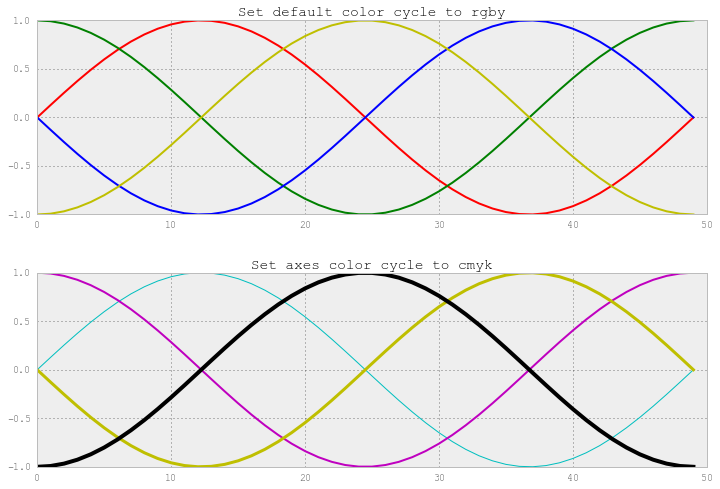

In [61]:
# I needed this for my code to plot correctly. It may not be necessary for you. 

from cycler import cycler
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi)
offsets = np.linspace(0, 2*np.pi, 4, endpoint=False)
# Create array with shifted-sine curve along each column
yy = np.transpose([np.sin(x + phi) for phi in offsets])

plt.rc('lines', linewidth=2)
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'y', 'c', 'm', 'y', 'k']) +
                           cycler('linestyle', ['-', '-', '-', '-','-', '-', '-', '-'])))
fig, (ax0, ax1) = plt.subplots(nrows=2)
ax0.plot(yy)
ax0.set_title('Set default color cycle to rgby')

ax1.set_prop_cycle(cycler('color', ['c', 'm', 'y', 'k']) +
                   cycler('lw', [1, 2, 3, 4]))
ax1.plot(yy)
ax1.set_title('Set axes color cycle to cmyk')

# Tweak spacing between subplots to prevent labels from overlapping
plt.subplots_adjust(hspace=0.3)
plt.show()

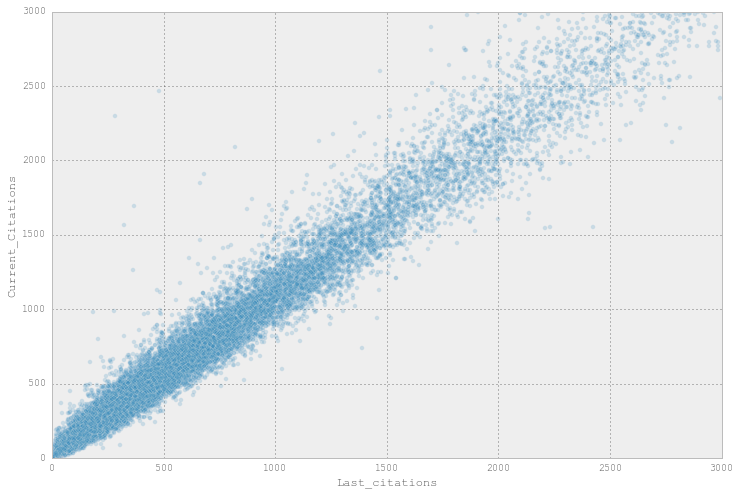

In [63]:
# Let's do a scatterplot 
df.plot(kind='scatter', x='Last_citations', y='Current_Citations', xlim=(0,3000), ylim=(0,3000), alpha=0.2)

In [66]:
# Apparently, there is a strong autocorrelation between current year and last year citation. Let's 
# create a Growth variable for predicting growth of citations
df["Current_Growth"] = map(lambda x,y: x-y, df["Current_Citations"],  df["Last_citations"])
df["Last_Growth"] = map(lambda x,y: x-y, df["Last_citations"],  df["Last2_citations"])
df["Current_Growth_Squared"] = map(lambda x,y: (x-y)**2, df["Current_Citations"],  df["Last_citations"])
df["Last_Growth_Squared"] = map(lambda x,y: (x-y)**2, df["Last_citations"],  df["Last2_citations"])
df["Cumulative_Citations_Squared"] = map(lambda x: x**2, df["Cumulative_Citations"])

# and relative growth...
df["Current_Growth_Relative"] = map(lambda x,y: 1.0*x/y if y>0 and y!=None else None, df["Current_Growth"],  df["Last_citations"])
df["Last_Growth_Relative"] = map(lambda x,y: 1.0*x/y if y>0 and y!=None else None, df["Last_Growth"],  df["Last2_citations"])

df.head(100)

,Name,Start,Years Active,Year,Current_Citations,Cumulative_Citations,Age,Last_citations,Last2_citations,Current_Growth,Last_Growth,Current_Growth_Squared,Last_Growth_Squared,Cumulative_Citations_Squared,Current_Growth_Relative,Last_Growth_Relative
0,Russ Altman (jZoDCSsAAAAJ),1992,23,1992,63,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1,Russ Altman (jZoDCSsAAAAJ),1992,23,1993,74,63,1,63,NaN,11,NaN,121,NaN,3969,0.174603,NaN
2,Russ Altman (jZoDCSsAAAAJ),1992,23,1994,76,137,2,74,63,2,11,4,121,18769,0.027027,0.174603
3,Russ Altman (jZoDCSsAAAAJ),1992,23,1995,82,213,3,76,74,6,2,36,4,45369,0.078947,0.027027
4,Russ Altman (jZoDCSsAAAAJ),1992,23,1996,76,295,4,82,76,-6,6,36,36,87025,-0.073171,0.078947
5,Russ Altman (jZoDCSsAAAAJ),1992,23,1997,82,371,5,76,82,6,-6,36,36,137641,0.078947,-0.073171
6,Russ Altman (jZoDCSsAAAAJ),1992,23,1998,136,453,6,82,76,54,6,2916,36,205209,0.658537,0.078947
7,Russ Altman (jZoDCSsAAAAJ),1992,23,1999,119,589,7,136,82,-17,54,289,2916,346921,-0.125000,0.658537
8,Russ Altman (jZoDCSsAAAAJ),1992,23,2000,101,708,8,119,136,-18,-17,324,289,501264,-0.151261,-0.125000
9,Russ Altman (jZoDCSsAAAAJ),1992,23,2001,181,809,9,101,119,80,-18,6400,324,654481,0.792079,-0.151261


In [69]:
# Let's see, on average, how much a professor's citations grow year-on-year 

df[["Last_Growth_Relative", "Current_Growth_Relative"]].mean(axis=0)

Last_Growth_Relative       0.340478
Current_Growth_Relative    0.338674
dtype: float64

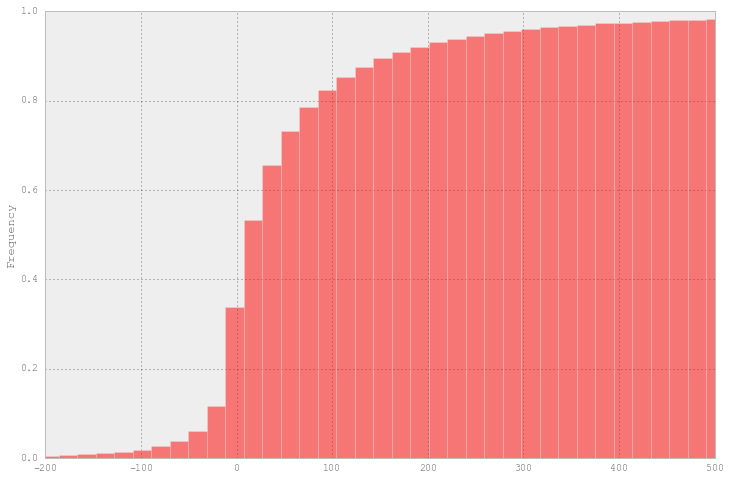

In [65]:
# Let's take a look at the distribution of the Growth variable
import matplotlib.cbook as cbook
df["Current_Growth"].plot(kind='hist', alpha=0.5, cumulative=True, bins=500, xlim=(-200,500), ylim=(0,1),normed=True)


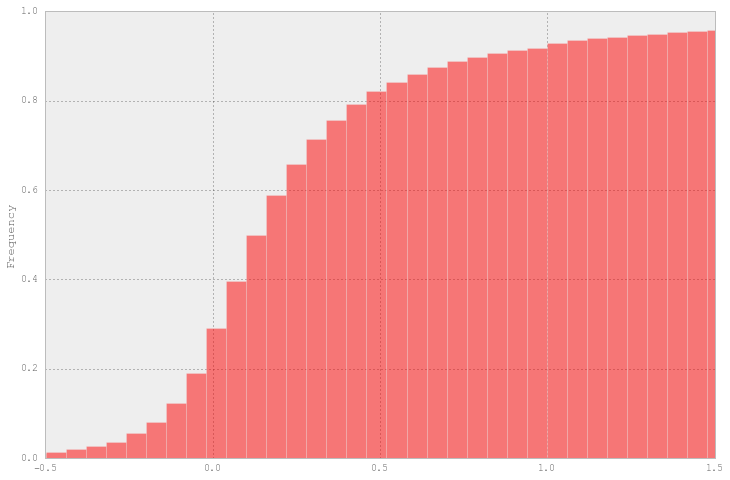

In [66]:
# Let's take a look at the distribution of the RelGrowth variable
df["Current_Growth_Relative"].plot(kind='hist', alpha=0.5, cumulative=True,bins=500, xlim=(-0.5,1.5), ylim=(0,1), normed=True)

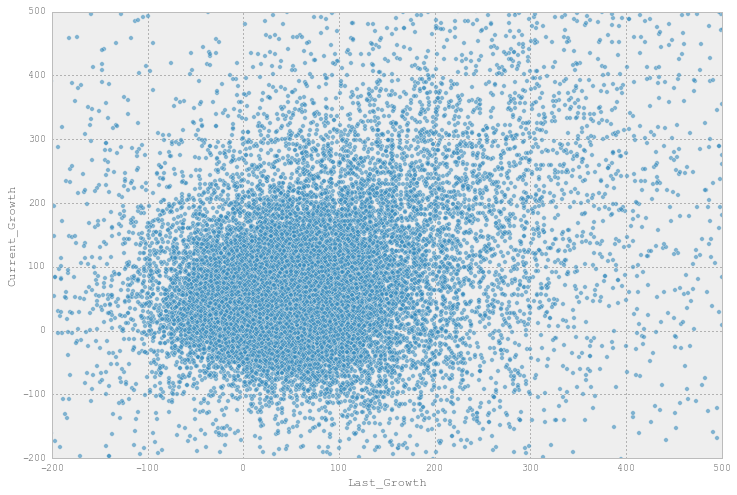

In [73]:
df.plot(kind='scatter', x='Last_Growth', y='Current_Growth', xlim=(-200,500), ylim=(-200,500), alpha=0.6)

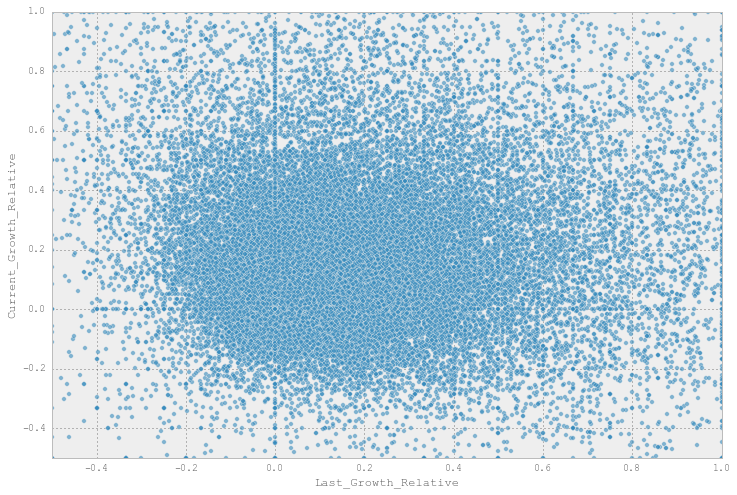

In [69]:
df.plot(kind='scatter', x='Last_Growth_Relative', y='Current_Growth_Relative', xlim=(-0.5,1), ylim=(-0.5,1), alpha=0.6) 

# Exploratory Plots

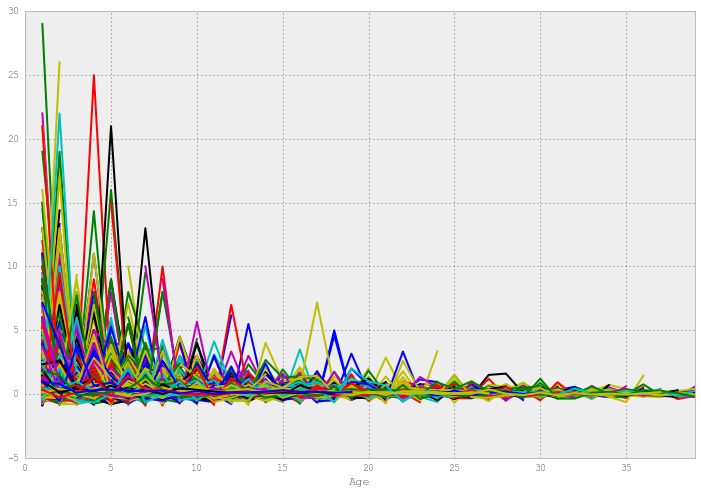

In [80]:
# This creates a pivot table with Authors as columns, in order to do some exploratory plots
currgrowth = df.pivot(index='Age', columns='Name', values='Current_Growth_Relative')
currgrowth.head()

currgrowth.plot(legend=False)

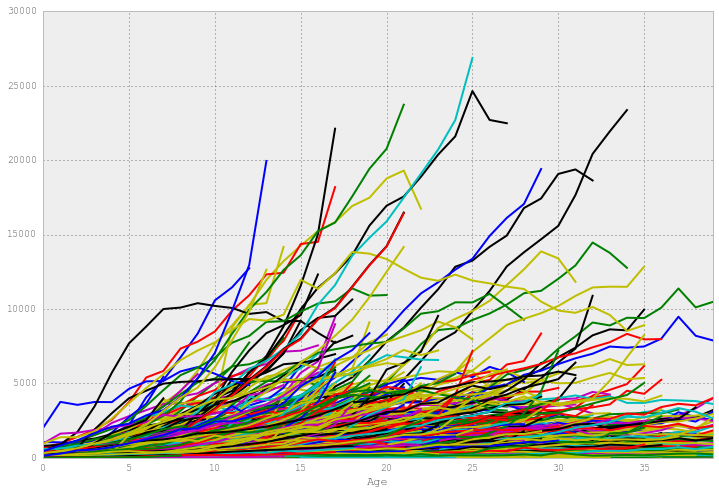

In [81]:
currcitations = df.pivot(index='Age', columns='Name', values='Current_Citations')
currcitations.head()

currcitations.plot(legend=False)

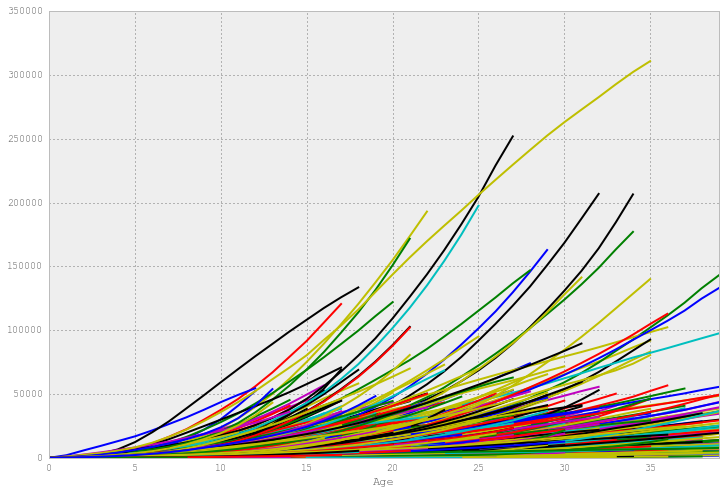

In [83]:
cummcitations = df.pivot(index='Age', columns='Name', values='Cumulative_Citations')
cummcitations.head()

cummcitations.plot(legend=False)

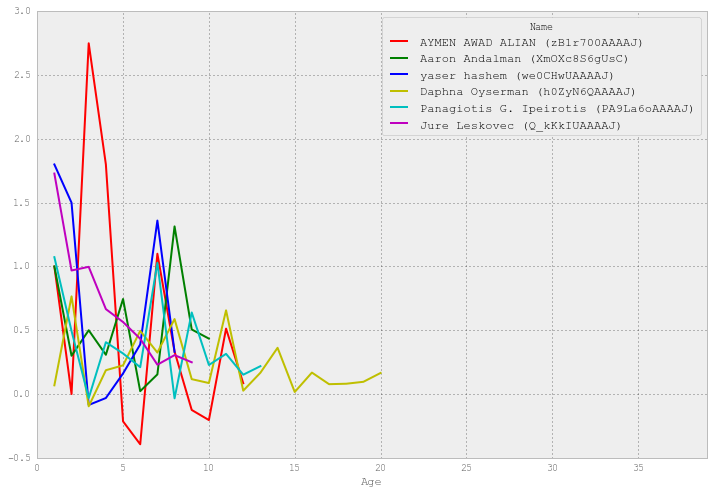

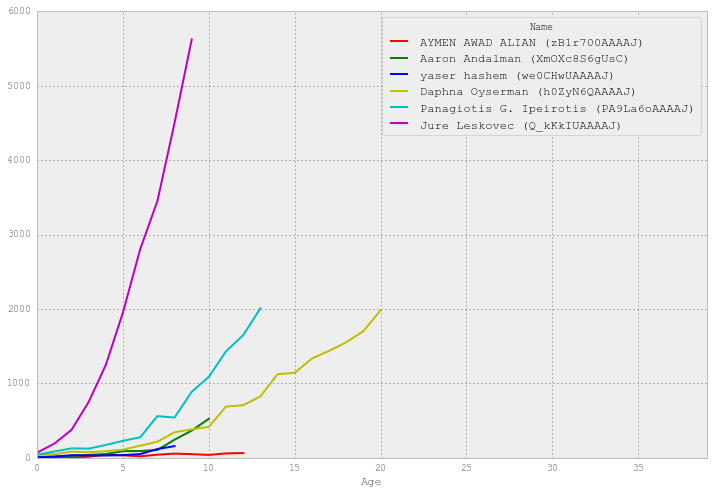

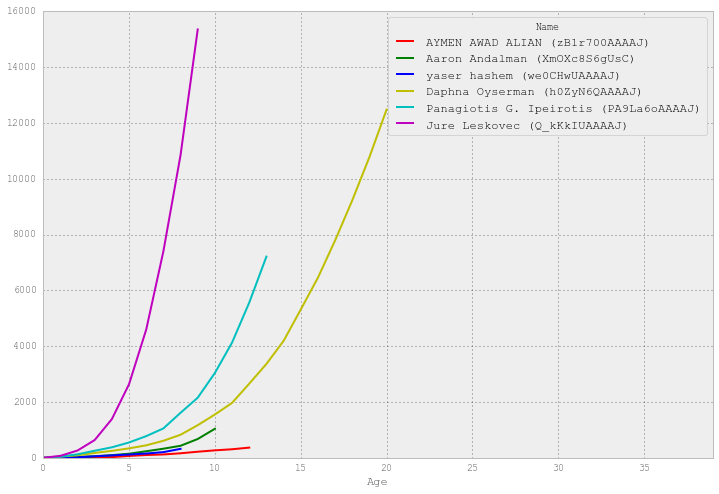

In [88]:
# Let's narrow the data down to just a few professors

currgrowth[["AYMEN AWAD ALIAN (zB1r700AAAAJ)","Aaron Andalman (XmOXc8S6gUsC)", "yaser hashem (we0CHwUAAAAJ)", "Daphna Oyserman (h0ZyN6QAAAAJ)", "Panagiotis G. Ipeirotis (PA9La6oAAAAJ)", "Jure Leskovec (Q_kKkIUAAAAJ)" ]].plot(legend=True, logy=False)
currcitations[["AYMEN AWAD ALIAN (zB1r700AAAAJ)","Aaron Andalman (XmOXc8S6gUsC)", "yaser hashem (we0CHwUAAAAJ)", "Daphna Oyserman (h0ZyN6QAAAAJ)", "Panagiotis G. Ipeirotis (PA9La6oAAAAJ)", "Jure Leskovec (Q_kKkIUAAAAJ)"]].plot(legend=True, logy=False)
cummcitations[["AYMEN AWAD ALIAN (zB1r700AAAAJ)","Aaron Andalman (XmOXc8S6gUsC)", "yaser hashem (we0CHwUAAAAJ)", "Daphna Oyserman (h0ZyN6QAAAAJ)", "Panagiotis G. Ipeirotis (PA9La6oAAAAJ)", "Jure Leskovec (Q_kKkIUAAAAJ)"]].plot(legend=True, logy=False)


# Applying the Bass Diffusion Model

In [28]:
# Now, let's see if we can fit the Bass Product Diffusion Model to our dataset. The Bass Model requires three variables; 
# 'm', the parameter representing the total number of customers in the adopting target segment, all of whom will eventually adopt the product
# 'p', the coefficient of innovation (or coefficient of external influence)
# 'q', the coefficient of imitation (or coefficient of internal influence)
# Using the methodology found in this video (https://www.youtube.com/watch?v=3QoZn9mxjjs), we can estimate 'm', 'p', and 'q' 
# by running a multiple regression on cumulative citations and cumulative citations squared

# Let's first run the multiple regression on our entire dataset. 

import statsmodels.formula.api as sm
import math

result = sm.ols(formula="Current_Citations ~ Cumulative_Citations + Cumulative_Citations_Squared", data=df).fit()
print result.summary()

coefficients = result.params
a = coefficients[0]
b = coefficients[1]
c = coefficients[2]

# Using our coefficients 'a', 'b', and 'c', we can calculate a coefficient of innovation ('p') and imitation ('q')

mplus = (-b + math.sqrt(b**2-4*a*c))/(2*c)
mminus = (-b - math.sqrt(b**2-4*a*c))/(2*c)
m=mminus
p = 1/mminus
q = b + p

print 'm: ', mminus
print 'p: ', p
print 'q: ', q



                            OLS Regression Results                            
Dep. Variable:      Current_Citations   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                 1.093e+05
Date:                Sat, 02 Jan 2016   Prob (F-statistic):               0.00
Time:                        15:19:03   Log-Likelihood:            -3.8360e+05
No. Observations:               50067   AIC:                         7.672e+05
Df Residuals:                   50064   BIC:                         7.672e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Intercept       

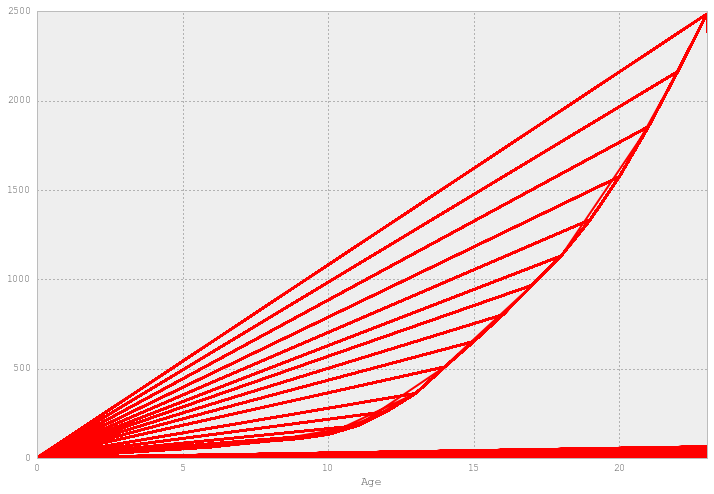

In [29]:
# We can then use these paramaters in the Bass Model formulation

ts = pd.Series(p*m+(q-p)*df["Cumulative_Citations"]-(q/m)*df["Cumulative_Citations"]**2, index=df["Age"])

ts.plot()


In [30]:
# We see it doesn't look too good because it seems to be creating a curve for each professor. Let's take the 'm', 'p', and 'q' calculated
# above and consider them as the average values for the data. We can then plot one professor's performance agains the average.

import requests
import json
import csv
import pandas as pd
from  datetime import datetime
from requests.auth import HTTPBasicAuth
from time import sleep

professors = set(['PA9La6oAAAAJ'])

def get_data(scholar_id):
    try:
        url ='http://citation-analysis.appspot.com/api/author?q={"filters":[{"name":"scholar_id","op":"==","val":"'+ scholar_id +'"}],"single":true}'
        resp = requests.get(url)
    except:
        print "Problem connecting", scholar_id
        return None
    
    if resp.status_code != 200:
        print "No 200", scholar_id
        return None
    
    try: 
        data = json.loads(resp.text)
    except:
        print "No JSON", scholar_id
        return None
                  
    return data
                  
                  
                  
def parse_yearly_cits(data):
    result = dict()
    for entry in data:
        year = entry["year"]
        citations = entry["citations"]
        result[year] = citations
    return result
    

headers = ['Name', 'Start', 'Years Active', 'Year', 'Current_Citations', 'Cumulative_Citations', 'Age', 'Last_citations', 'Last2_citations']

tuples = []

cnt = 0
for scholar_id in professors:
    
    cnt = cnt + 1
    if (cnt % 100 ==0):
        print cnt, "/", len(professors)

    data = get_data(scholar_id)
    if data == None:
        continue
                  
    name = data["name"]
    yearly_cits = parse_yearly_cits(data["citations_per_year"])
    
    if yearly_cits == None or len(yearly_cits)==0:
        print "No Activity", scholar_id
        continue
        
    start = min(yearly_cits.keys())
    end = max(yearly_cits.keys())
    current_age = end-start
    
    # print "OK", author
    cumulative_citations = 0 
    
    for year in sorted(yearly_cits.keys()):
        current_year = int(year)

        citations = int(yearly_cits.get(year)) 
        
        # This is just an adjustment for the citations for the current year
        if current_year==2015:
            last_time_retrieved = datetime.strptime(data["retrieved_at"], '%Y-%m-%dT%H:%M:%S')
            day_of_year = last_time_retrieved.timetuple().tm_yday
            
            # The 1.25 is an empirical factor
            citations = 1.25 * (365 * citations) / day_of_year
            
        last_year_citations = yearly_cits.get(current_year-1)
        last2_year_citations = yearly_cits.get(current_year-2)

        # The Bass model requires the use of cumulative sums
        try:
            cumulative_citations = cumulative_citations + yearly_cits.get(current_year-1)
        except TypeError:
            cumulative_citations = cumulative_citations + 0
        #past_cumsum = cumulative_citations + yearly_cits.get(current_year-1)
        
        t = (name + ' ('+scholar_id+')', start, current_age, int(year), int(citations), int(cumulative_citations), int(year)-start, last_year_citations, last2_year_citations)
        tuples.append(t)

        

df2 = pd.DataFrame(data=tuples, columns = headers)

print len(set(professors))
print len(set(df['Name']))

df2.head(15)

1
2939


,Name,Start,Years Active,Year,Current_Citations,Cumulative_Citations,Age,Last_citations,Last2_citations
0,Panagiotis G. Ipeirotis (PA9La6oAAAAJ),2002,13,2002,41,0,0,NaN,NaN
1,Panagiotis G. Ipeirotis (PA9La6oAAAAJ),2002,13,2003,85,41,1,41,NaN
2,Panagiotis G. Ipeirotis (PA9La6oAAAAJ),2002,13,2004,127,126,2,85,41
3,Panagiotis G. Ipeirotis (PA9La6oAAAAJ),2002,13,2005,123,253,3,127,85
4,Panagiotis G. Ipeirotis (PA9La6oAAAAJ),2002,13,2006,173,376,4,123,127
5,Panagiotis G. Ipeirotis (PA9La6oAAAAJ),2002,13,2007,228,549,5,173,123
6,Panagiotis G. Ipeirotis (PA9La6oAAAAJ),2002,13,2008,276,777,6,228,173
7,Panagiotis G. Ipeirotis (PA9La6oAAAAJ),2002,13,2009,560,1053,7,276,228
8,Panagiotis G. Ipeirotis (PA9La6oAAAAJ),2002,13,2010,541,1613,8,560,276
9,Panagiotis G. Ipeirotis (PA9La6oAAAAJ),2002,13,2011,887,2154,9,541,560


In [48]:
# This new variable will chart the performance of a single professor

byyear_prof = df2.pivot(index='Age', columns='Name', values='Current_Citations')
byyear_prof.head()

Name,Panagiotis G. Ipeirotis (PA9La6oAAAAJ)
Age,
0,41
1,85
2,127
3,123
4,173


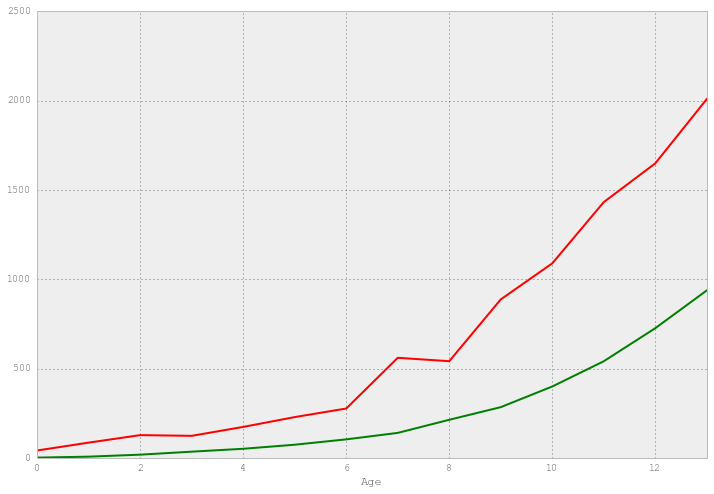

In [49]:
# Creating the squared cumulative citations variable

df2["Cumulative_Citations_Squared"] = map(lambda x: x**2, df2["Cumulative_Citations"])

# For now, let's use the average 'm','p' and 'q' value calculated above 

p = 2.05665783305e-06
m= 486225.751279
q = 0.131825057394

ts = pd.Series(p*m+(q-p)*df2["Cumulative_Citations"]-(q/m)*df2["Cumulative_Citations"]**2, index=df2["Age"])
ts2 = byyear_prof[["Panagiotis G. Ipeirotis (PA9La6oAAAAJ)"]].plot(legend=False, logy=False)

ts.plot()

                            OLS Regression Results                            
Dep. Variable:      Current_Citations   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     720.2
Date:                Sat, 02 Jan 2016   Prob (F-statistic):           2.18e-12
Time:                        15:35:57   Log-Likelihood:                -75.871
No. Observations:                  14   AIC:                             157.7
Df Residuals:                      11   BIC:                             159.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Intercept       

[]

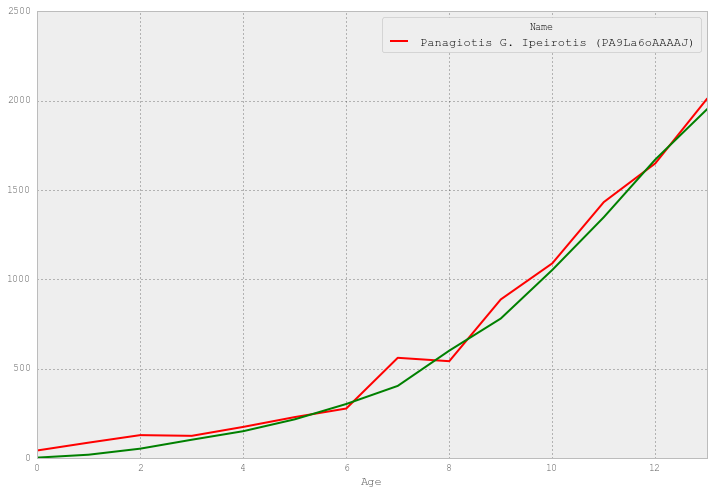

In [50]:
# Good job! It seems that you far outperform the average predicted curve.

# Now, let's see how you perform compared to a Bass curve created from just your own citation data

import statsmodels.formula.api as sm
import math

result = sm.ols(formula="Current_Citations ~ Cumulative_Citations + Cumulative_Citations_Squared", data=df2).fit()
print result.summary()

coefficients = result.params
a = coefficients[0]
b = coefficients[1]
c = coefficients[2]

# Using our coefficients 'a', 'b', and 'c', we can calculate a coefficient of innovation ('p') and imitation ('q')

mplus = (-b + math.sqrt(b**2-4*a*c))/(2*c)
mminus = (-b - math.sqrt(b**2-4*a*c))/(2*c)
m=mminus
p = 1/mminus
q = b + p

print 'm: ', mminus
print 'p: ', p
print 'q: ', q

ts = pd.Series(p*m+(q-p)*df2["Cumulative_Citations"]-(q/m)*df2["Cumulative_Citations"]**2, index=df2["Age"])
#ts = pd.Series(((p+q)*(df["Cumulative_Citations"]/m)*(m-df["Cumulative_Citations"])), index=df["Age"])
ts2 = byyear_prof[["Panagiotis G. Ipeirotis (PA9La6oAAAAJ)"]].plot(legend=True, logy=False)

ts.plot()
ts2.plot()

In [51]:
# We see that in most years, you outperform your predicted model. We can use this same approach for other professors. 

# This is the same code as before, just with a different professor.

import requests
import json
import csv
import pandas as pd
from  datetime import datetime
from requests.auth import HTTPBasicAuth
from time import sleep

professors = set(['Q_kKkIUAAAAJ'])

def get_data(scholar_id):
    try:
        url ='http://citation-analysis.appspot.com/api/author?q={"filters":[{"name":"scholar_id","op":"==","val":"'+ scholar_id +'"}],"single":true}'
        resp = requests.get(url)
    except:
        print "Problem connecting", scholar_id
        return None
    
    if resp.status_code != 200:
        print "No 200", scholar_id
        return None
    
    try: 
        data = json.loads(resp.text)
    except:
        print "No JSON", scholar_id
        return None
                  
    return data
                  
                  
                  
def parse_yearly_cits(data):
    result = dict()
    for entry in data:
        year = entry["year"]
        citations = entry["citations"]
        result[year] = citations
    return result
    

headers = ['Name', 'Start', 'Years Active', 'Year', 'Current_Citations', 'Cumulative_Citations', 'Age', 'Last_citations', 'Last2_citations']

tuples = []

cnt = 0
for scholar_id in professors:
    
    cnt = cnt + 1
    if (cnt % 100 ==0):
        print cnt, "/", len(professors)

    data = get_data(scholar_id)
    if data == None:
        continue
                  
    name = data["name"]
    yearly_cits = parse_yearly_cits(data["citations_per_year"])
    
    if yearly_cits == None or len(yearly_cits)==0:
        print "No Activity", scholar_id
        continue
        
    start = min(yearly_cits.keys())
    end = max(yearly_cits.keys())
    current_age = end-start
    
    # print "OK", author
    cumulative_citations = 0 
    
    for year in sorted(yearly_cits.keys()):
        current_year = int(year)

        citations = int(yearly_cits.get(year)) 
        
        # This is just an adjustment for the citations for the current year
        if current_year==2015:
            last_time_retrieved = datetime.strptime(data["retrieved_at"], '%Y-%m-%dT%H:%M:%S')
            day_of_year = last_time_retrieved.timetuple().tm_yday
            
            # The 1.25 is an empirical factor
            citations = 1.25 * (365 * citations) / day_of_year
            
        last_year_citations = yearly_cits.get(current_year-1)
        last2_year_citations = yearly_cits.get(current_year-2)

        # The Bass model requires the use of cumulative sums
        try:
            cumulative_citations = cumulative_citations + yearly_cits.get(current_year-1)
        except TypeError:
            cumulative_citations = cumulative_citations + 0
        #past_cumsum = cumulative_citations + yearly_cits.get(current_year-1)
        
        t = (name + ' ('+scholar_id+')', start, current_age, int(year), int(citations), int(cumulative_citations), int(year)-start, last_year_citations, last2_year_citations)
        tuples.append(t)

        

df3 = pd.DataFrame(data=tuples, columns = headers)

print len(set(professors))
print len(set(df['Name']))

df3.head(15)


1
2939


,Name,Start,Years Active,Year,Current_Citations,Cumulative_Citations,Age,Last_citations,Last2_citations
0,Jure Leskovec (Q_kKkIUAAAAJ),2006,9,2006,70,0,0,NaN,NaN
1,Jure Leskovec (Q_kKkIUAAAAJ),2006,9,2007,191,70,1,70,NaN
2,Jure Leskovec (Q_kKkIUAAAAJ),2006,9,2008,376,261,2,191,70
3,Jure Leskovec (Q_kKkIUAAAAJ),2006,9,2009,751,637,3,376,191
4,Jure Leskovec (Q_kKkIUAAAAJ),2006,9,2010,1251,1388,4,751,376
5,Jure Leskovec (Q_kKkIUAAAAJ),2006,9,2011,1957,2639,5,1251,751
6,Jure Leskovec (Q_kKkIUAAAAJ),2006,9,2012,2805,4596,6,1957,1251
7,Jure Leskovec (Q_kKkIUAAAAJ),2006,9,2013,3450,7401,7,2805,1957
8,Jure Leskovec (Q_kKkIUAAAAJ),2006,9,2014,4502,10851,8,3450,2805
9,Jure Leskovec (Q_kKkIUAAAAJ),2006,9,2015,5623,15353,9,4502,3450


In [52]:
byyear_prof = df3.pivot(index='Age', columns='Name', values='Current_Citations')
byyear_prof.head()

Name,Jure Leskovec (Q_kKkIUAAAAJ)
Age,
0,70
1,191
2,376
3,751
4,1251


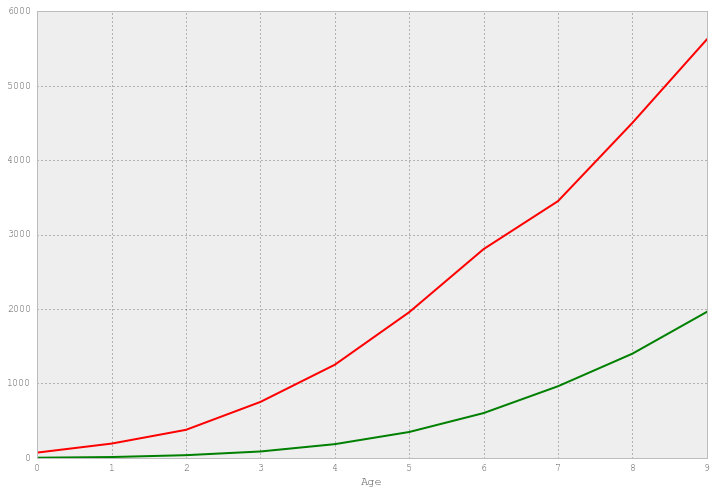

In [53]:
df3["Current_Growth"] = map(lambda x,y: x-y, df3["Current_Citations"],  df3["Last_citations"])
df3["Last_Growth"] = map(lambda x,y: x-y, df3["Last_citations"],  df3["Last2_citations"])
df3["Current_Growth_Squared"] = map(lambda x,y: (x-y)**2, df3["Current_Citations"],  df3["Last_citations"])
df3["Last_Growth_Squared"] = map(lambda x,y: (x-y)**2, df3["Last_citations"],  df3["Last2_citations"])
df3["Cumulative_Citations_Squared"] = map(lambda x: x**2, df3["Cumulative_Citations"])

# and relative growth...
df3["Current_Growth_Relative"] = map(lambda x,y: 1.0*x/y if y>0 and y!=None else None, df3["Current_Growth"],  df3["Last_citations"])
df3["Last_Growth_Relative"] = map(lambda x,y: 1.0*x/y if y>0 and y!=None else None, df3["Last_Growth"],  df3["Last2_citations"])

# For now, let's use the average 'm','p' and 'q' value calculated above 

p = 2.05665783305e-06
m= 486225.751279
q = 0.131825057394

ts = pd.Series(p*m+(q-p)*df3["Cumulative_Citations"]-(q/m)*df3["Cumulative_Citations"]**2, index=df3["Age"])
ts2 = byyear_prof[["Jure Leskovec (Q_kKkIUAAAAJ)"]].plot(legend=False, logy=False)

ts.plot()

                            OLS Regression Results                            
Dep. Variable:      Current_Citations   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     334.2
Date:                Sat, 02 Jan 2016   Prob (F-statistic):           1.13e-07
Time:                        15:36:24   Log-Likelihood:                -66.509
No. Observations:                  10   AIC:                             139.0
Df Residuals:                       7   BIC:                             139.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Intercept       

[]

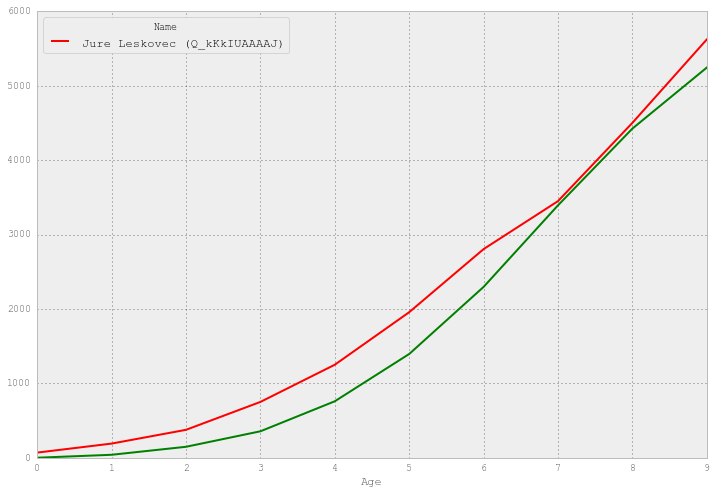

In [54]:
# We see that Jure Leskovec far outperforms the average curve. What about compared to his own predicted curve?

import statsmodels.formula.api as sm
import math

result = sm.ols(formula="Current_Citations ~ Cumulative_Citations + Cumulative_Citations_Squared", data=df3).fit()
print result.summary()

coefficients = result.params
a = coefficients[0]
b = coefficients[1]
c = coefficients[2]

# Using our coefficients 'a', 'b', and 'c', we can calculate a coefficient of innovation ('p') and imitation ('q')

mplus = (-b + math.sqrt(b**2-4*a*c))/(2*c)
mminus = (-b - math.sqrt(b**2-4*a*c))/(2*c)
m=mminus
p = 1/mminus
q = b + p

print 'm: ', mminus
print 'p: ', p
print 'q: ', q

ts = pd.Series(p*m+(q-p)*df3["Cumulative_Citations"]-(q/m)*df3["Cumulative_Citations"]**2, index=df3["Age"])
ts2 = byyear_prof[["Jure Leskovec (Q_kKkIUAAAAJ)"]].plot(legend=True, logy=False)

ts.plot()
ts2.plot()
